# 4-8 분류 실습- 캐글 산탄데르 고객 만족 예측

## 1. 데이터 전처리

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
cust_df = pd.read_csv("C:/Users/user/Desktop/학교/학회/21-1/0405/train.csv", encoding='latin-1')
print('dataset shape: ', cust_df.shape)
cust_df.head(3)

dataset shape:  (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape 오류

-> \ 대신 / 사용

클래스 값 칼럼을 포함한 피처가 371개 존재. 피처의 타입과 null 값을 알아봄

In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


111개의 피처 float형, 260개 피처 int형, null 값은 없음.

만족, 불만족의 비율-> target 속성의 값 분포를 알아야함.

In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


대부분이 만족이고, 4% 정도만 불만족

각 피처의 값 분포를 간단히 확인

In [4]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


NaN이나 특정 예외 값을 -999999로 변환했을 것으로 보임. 116개나 존재하므로 가장 많은 값인 2로 변환.

In [5]:
cust_df['var3'].replace(-999999,2,inplace=True) # 값 변환
cust_df.drop('ID', axis=1, inplace=True) # 특정 변수 삭제

# 피처 세트와 레이블 세트 분리. 레이블 칼럼은 data frame의 제일 마지막에 위치
X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape: {0}'.format(X_features.shape))

피처 데이터 shape: (76020, 369)


In [6]:
# 학습 데이터 세트와 테스트 데이터 세트를 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 shape: {0}, 테스트 세트 shape: {1}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 shape: (60816, 369), 테스트 세트 shape: (15204, 369)
학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


학습, 테스트 데이터 세트 모두 원본 데이터와 유사하게 TARGET 값의 분포가 4% 정도로 만들어짐.

## 2. XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc, 조기 중단 파라미터는 100으로 설정 후 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, 
            eval_metric="auc", eval_set=[(X_train, y_train),(X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], 
                             average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.82005	validation_1-auc:0.81157
[1]	validation_0-auc:0.83400	validation_1-auc:0.82452
[2]	validation_0-auc:0.83870	validation_1-auc:0.82746
[3]	validation_0-auc:0.84419	validation_1-auc:0.82922
[4]	validation_0-auc:0.84783	validation_1-auc:0.83298
[5]	validation_0-auc:0.85125	validation_1-auc:0.83500
[6]	validation_0-auc:0.85501	validation_1-auc:0.83653
[7]	validation_0-auc:0.85830	validation_1-auc:0.83782
[8]	validation_0-auc:0.86143	validation_1-auc:0.83802
[9]	validation_0-auc:0.86452	validation_1-auc:0.83914
[10]	validation_0-auc:0.86717	validation_1-auc:0.83954
[11]	validation_0-auc:0.87013	validation_1-auc:0.83983
[12]	validation_0-auc:0.87369	validation_1-auc:0.84033
[13]	validation_0-auc:0.87620	validation_1-auc:0.84054
[14]	validation_0-auc:0.87799	validation_1-auc:0.84135
[15]	validation_0-auc:0.88072	validation_1-auc:0.84117
[16]	validation_0-auc:0.88237	validation_1-auc:0.84101
[17]	validation_0-auc:0.88352	validation_1-auc:0.84071
[18]	validation_0-au

average='macro' ? - 각 열에 대한 precision 값을 모두 더한 다음 열의 갯수로 나눈 것 

precision_score에서의 average 옵션
- None : 라벨 별 각 평균을 그대로 구합니다.
- micro : 전체 평균
- macro : 라벨 별 각 합의 평균

예제랑 다른 값(0.8419)

In [8]:
# XGBoost의 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5,7], 'min_child_weight':[1,3], 'colsample_bytree':[0.5,0.75]}

# cv는 3으로 지정
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
          eval_set=[(X_train, y_train),(X_test, y_test)])

print('GridSearchCV 최적 파라미터: ', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.79161	validation_1-auc:0.79321
[1]	validation_0-auc:0.81865	validation_1-auc:0.81375
[2]	validation_0-auc:0.82586	validation_1-auc:0.81846
[3]	validation_0-auc:0.82789	validation_1-auc:0.82226
[4]	validation_0-auc:0.83249	validation_1-auc:0.82677
[5]	validation_0-auc:0.83477	validation_1-auc:0.83225
[6]	validation_0-auc:0.83340	validation_1-auc:0.82654
[7]	validation_0-auc:0.84223	validation_1-auc:0.83486
[8]	validation_0-auc:0.84586	validation_1-auc:0.83682
[9]	validation_0-auc:0.84557	validation_1-auc:0.83472
[10]	validation_0-auc:0.84423	validation_1-auc:0.83181
[11]	validation_0-auc:0.84428	validation_1-auc:0.82920
[12]	validation_0-auc:0.85176	validation_1-auc:0.83433
[13]	validation_0-auc:0.85540	validation_1-auc:0.83565
[14]	validation_0-auc:0.85719	validation_1-auc:0.83696
[15]	validation_0-auc:0.85849	validation_1-auc:0.83561
[16]	validation_0-auc:0.85964	validation_1-auc:0.83578
[17]	validation_0-auc:0.86092	validation_1-auc:0.83570
[18]	validation_0-au

[55]	validation_0-auc:0.88128	validation_1-auc:0.83834
[56]	validation_0-auc:0.88146	validation_1-auc:0.83873
[57]	validation_0-auc:0.88158	validation_1-auc:0.83860
[58]	validation_0-auc:0.88183	validation_1-auc:0.83810
[59]	validation_0-auc:0.88192	validation_1-auc:0.83774
[0]	validation_0-auc:0.79210	validation_1-auc:0.79292
[1]	validation_0-auc:0.81759	validation_1-auc:0.81404
[2]	validation_0-auc:0.82567	validation_1-auc:0.81864
[3]	validation_0-auc:0.82819	validation_1-auc:0.82244
[4]	validation_0-auc:0.83233	validation_1-auc:0.82618
[5]	validation_0-auc:0.83480	validation_1-auc:0.83163
[6]	validation_0-auc:0.83342	validation_1-auc:0.82840
[7]	validation_0-auc:0.84265	validation_1-auc:0.83512
[8]	validation_0-auc:0.84614	validation_1-auc:0.83742
[9]	validation_0-auc:0.84573	validation_1-auc:0.83475
[10]	validation_0-auc:0.84426	validation_1-auc:0.83066
[11]	validation_0-auc:0.84358	validation_1-auc:0.82937
[12]	validation_0-auc:0.85089	validation_1-auc:0.83491
[13]	validation_0-au

[52]	validation_0-auc:0.87650	validation_1-auc:0.84097
[0]	validation_0-auc:0.80843	validation_1-auc:0.80885
[1]	validation_0-auc:0.82920	validation_1-auc:0.82211
[2]	validation_0-auc:0.83320	validation_1-auc:0.82400
[3]	validation_0-auc:0.83625	validation_1-auc:0.82577
[4]	validation_0-auc:0.84188	validation_1-auc:0.82897
[5]	validation_0-auc:0.84455	validation_1-auc:0.83377
[6]	validation_0-auc:0.84503	validation_1-auc:0.82916
[7]	validation_0-auc:0.85319	validation_1-auc:0.83364
[8]	validation_0-auc:0.85976	validation_1-auc:0.83390
[9]	validation_0-auc:0.85952	validation_1-auc:0.82834
[10]	validation_0-auc:0.85919	validation_1-auc:0.82378
[11]	validation_0-auc:0.85956	validation_1-auc:0.82400
[12]	validation_0-auc:0.86574	validation_1-auc:0.82888
[13]	validation_0-auc:0.87028	validation_1-auc:0.83251
[14]	validation_0-auc:0.87240	validation_1-auc:0.83311
[15]	validation_0-auc:0.87366	validation_1-auc:0.83080
[16]	validation_0-auc:0.87568	validation_1-auc:0.83134
[17]	validation_0-au

[21]	validation_0-auc:0.87528	validation_1-auc:0.83259
[22]	validation_0-auc:0.87571	validation_1-auc:0.83274
[23]	validation_0-auc:0.87659	validation_1-auc:0.83362
[24]	validation_0-auc:0.87708	validation_1-auc:0.83315
[25]	validation_0-auc:0.87741	validation_1-auc:0.83338
[26]	validation_0-auc:0.87761	validation_1-auc:0.83358
[27]	validation_0-auc:0.87814	validation_1-auc:0.83337
[28]	validation_0-auc:0.87820	validation_1-auc:0.83346
[29]	validation_0-auc:0.87882	validation_1-auc:0.83331
[30]	validation_0-auc:0.87900	validation_1-auc:0.83315
[31]	validation_0-auc:0.87990	validation_1-auc:0.83277
[32]	validation_0-auc:0.88062	validation_1-auc:0.83284
[33]	validation_0-auc:0.88094	validation_1-auc:0.83339
[34]	validation_0-auc:0.88210	validation_1-auc:0.83309
[35]	validation_0-auc:0.88208	validation_1-auc:0.83317
[36]	validation_0-auc:0.88225	validation_1-auc:0.83314
[37]	validation_0-auc:0.88238	validation_1-auc:0.83292
[0]	validation_0-auc:0.81176	validation_1-auc:0.80947
[1]	validat

[43]	validation_0-auc:0.87845	validation_1-auc:0.83286
[0]	validation_0-auc:0.80863	validation_1-auc:0.80010
[1]	validation_0-auc:0.82349	validation_1-auc:0.81717
[2]	validation_0-auc:0.82654	validation_1-auc:0.81737
[3]	validation_0-auc:0.82988	validation_1-auc:0.82281
[4]	validation_0-auc:0.83570	validation_1-auc:0.82554
[5]	validation_0-auc:0.83917	validation_1-auc:0.82930
[6]	validation_0-auc:0.84492	validation_1-auc:0.83396
[7]	validation_0-auc:0.84657	validation_1-auc:0.83569
[8]	validation_0-auc:0.84837	validation_1-auc:0.83476
[9]	validation_0-auc:0.85009	validation_1-auc:0.83841
[10]	validation_0-auc:0.85017	validation_1-auc:0.83887
[11]	validation_0-auc:0.85091	validation_1-auc:0.83723
[12]	validation_0-auc:0.85584	validation_1-auc:0.83976
[13]	validation_0-auc:0.85900	validation_1-auc:0.84063
[14]	validation_0-auc:0.86060	validation_1-auc:0.84054
[15]	validation_0-auc:0.86167	validation_1-auc:0.84086
[16]	validation_0-auc:0.86304	validation_1-auc:0.84085
[17]	validation_0-au

[15]	validation_0-auc:0.86040	validation_1-auc:0.83984
[16]	validation_0-auc:0.86126	validation_1-auc:0.83954
[17]	validation_0-auc:0.86170	validation_1-auc:0.83947
[18]	validation_0-auc:0.86276	validation_1-auc:0.83945
[19]	validation_0-auc:0.86327	validation_1-auc:0.84019
[20]	validation_0-auc:0.86381	validation_1-auc:0.84075
[21]	validation_0-auc:0.86454	validation_1-auc:0.84078
[22]	validation_0-auc:0.86531	validation_1-auc:0.84164
[23]	validation_0-auc:0.86598	validation_1-auc:0.84128
[24]	validation_0-auc:0.86650	validation_1-auc:0.84078
[25]	validation_0-auc:0.86717	validation_1-auc:0.84069
[26]	validation_0-auc:0.86742	validation_1-auc:0.84066
[27]	validation_0-auc:0.86807	validation_1-auc:0.84017
[28]	validation_0-auc:0.86913	validation_1-auc:0.84027
[29]	validation_0-auc:0.86952	validation_1-auc:0.84014
[30]	validation_0-auc:0.86972	validation_1-auc:0.84016
[31]	validation_0-auc:0.86996	validation_1-auc:0.83992
[32]	validation_0-auc:0.87071	validation_1-auc:0.84001
[33]	valid

[26]	validation_0-auc:0.89143	validation_1-auc:0.83694
[27]	validation_0-auc:0.89200	validation_1-auc:0.83660
[28]	validation_0-auc:0.89281	validation_1-auc:0.83711
[29]	validation_0-auc:0.89290	validation_1-auc:0.83771
[30]	validation_0-auc:0.89310	validation_1-auc:0.83717
[31]	validation_0-auc:0.89338	validation_1-auc:0.83704
[32]	validation_0-auc:0.89415	validation_1-auc:0.83731
[33]	validation_0-auc:0.89484	validation_1-auc:0.83674
[34]	validation_0-auc:0.89584	validation_1-auc:0.83723
[35]	validation_0-auc:0.89607	validation_1-auc:0.83724
[36]	validation_0-auc:0.89655	validation_1-auc:0.83646
[37]	validation_0-auc:0.89681	validation_1-auc:0.83664
[38]	validation_0-auc:0.89694	validation_1-auc:0.83654
[39]	validation_0-auc:0.89735	validation_1-auc:0.83618
[40]	validation_0-auc:0.89847	validation_1-auc:0.83615
[41]	validation_0-auc:0.89846	validation_1-auc:0.83613
[42]	validation_0-auc:0.89855	validation_1-auc:0.83601
[43]	validation_0-auc:0.89853	validation_1-auc:0.83532
[44]	valid

[3]	validation_0-auc:0.84271	validation_1-auc:0.82901
[4]	validation_0-auc:0.84766	validation_1-auc:0.83398
[5]	validation_0-auc:0.85126	validation_1-auc:0.83381
[6]	validation_0-auc:0.85486	validation_1-auc:0.83360
[7]	validation_0-auc:0.85943	validation_1-auc:0.83287
[8]	validation_0-auc:0.86243	validation_1-auc:0.83187
[9]	validation_0-auc:0.86501	validation_1-auc:0.83304
[10]	validation_0-auc:0.86496	validation_1-auc:0.83318
[11]	validation_0-auc:0.86466	validation_1-auc:0.83180
[12]	validation_0-auc:0.87013	validation_1-auc:0.83453
[13]	validation_0-auc:0.87319	validation_1-auc:0.83548
[14]	validation_0-auc:0.87479	validation_1-auc:0.83833
[15]	validation_0-auc:0.87618	validation_1-auc:0.83862
[16]	validation_0-auc:0.87739	validation_1-auc:0.83927
[17]	validation_0-auc:0.87883	validation_1-auc:0.83904
[18]	validation_0-auc:0.88009	validation_1-auc:0.83809
[19]	validation_0-auc:0.88083	validation_1-auc:0.83801
[20]	validation_0-auc:0.88192	validation_1-auc:0.83779
[21]	validation_0

min_child_weight: [기본설정값: 1] 과적합(overfitting)을 방지할 목적으로 사용되는데, 너무 높은 값은 과소적합(underfitting)을 야기하기 때문에 CV를 사용해서 적절한 값이 제시되어야 한다.

colsample_bytree: [기본설정값: 1] 개별 의사결정나무 모형에 사용될 변수갯수를 지정. 보통 0.5 ~ 1 사용됨.

GridSearchCV 최적 파라미터:'colsample_bytree': 0.5, 'max_depth': 5, min_child_weight': 3 / ROC AUC: 0.8445



In [9]:
# 위에서 얻은 최적 하이퍼 파라미터를 기반으로 최적화 진행
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156,learning_rate=0.2,
                       max_depth=5, min_child_weight=3, colsample_bytree=0.5,
                       reg_alpha=0.3)

# 성능 평가 지표를 auc, 조기 중단 파라미터는 200으로 설정 후 학습 수행
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc", eval_set=[(X_train, y_train),(X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],
                              average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[0]	validation_0-auc:0.70733	validation_1-auc:0.71700
[1]	validation_0-auc:0.80934	validation_1-auc:0.81693
[2]	validation_0-auc:0.80595	validation_1-auc:0.81218
[3]	validation_0-auc:0.81552	validation_1-auc:0.81580
[4]	validation_0-auc:0.81227	validation_1-auc:0.81109
[5]	validation_0-auc:0.82527	validation_1-auc:0.82172
[6]	validation_0-auc:0.83301	validation_1-auc:0.82996
[7]	validation_0-auc:0.83956	validation_1-auc:0.83169
[8]	validation_0-auc:0.84356	validation_1-auc:0.83691
[9]	validation_0-auc:0.84022	validation_1-auc:0.83358
[10]	validation_0-auc:0.84320	validation_1-auc:0.83655
[11]	validation_0-auc:0.84228	validation_1-auc:0.83464
[12]	validation_0-auc:0.84556	validation_1-auc:0.83742
[13]	validation_0-auc:0.84535	validation_1-auc:0.83547
[14]	validation_0-auc:0.84893	validation_1-auc:0.83757
[15]	validation_0-auc:0.84879	validation_1-auc:0.83696
[16]	validation_0-auc:0.85300	validation_1-auc:0.84025
[17]	validation_0-auc:0.85279	validation_1-auc:0.83993
[18]	validation_0-au

[149]	validation_0-auc:0.90805	validation_1-auc:0.83837
[150]	validation_0-auc:0.90818	validation_1-auc:0.83834
[151]	validation_0-auc:0.90823	validation_1-auc:0.83836
[152]	validation_0-auc:0.90823	validation_1-auc:0.83832
[153]	validation_0-auc:0.90831	validation_1-auc:0.83826
[154]	validation_0-auc:0.90832	validation_1-auc:0.83829
[155]	validation_0-auc:0.90836	validation_1-auc:0.83833
[156]	validation_0-auc:0.90894	validation_1-auc:0.83822
[157]	validation_0-auc:0.90900	validation_1-auc:0.83806
[158]	validation_0-auc:0.90914	validation_1-auc:0.83800
[159]	validation_0-auc:0.90949	validation_1-auc:0.83797
[160]	validation_0-auc:0.90952	validation_1-auc:0.83793
[161]	validation_0-auc:0.90962	validation_1-auc:0.83793
[162]	validation_0-auc:0.90983	validation_1-auc:0.83795
[163]	validation_0-auc:0.91009	validation_1-auc:0.83794
[164]	validation_0-auc:0.91044	validation_1-auc:0.83776
[165]	validation_0-auc:0.91053	validation_1-auc:0.83781
[166]	validation_0-auc:0.91089	validation_1-auc:

reg_alpha: L1 규제

ROC AUC: 0.8448 / XGBoost는 GBM보다는 빠르지만 GBM 기반이라 시간이 오래걸림.

튜닝된 모델에서 피처 중요도 그래프 그림

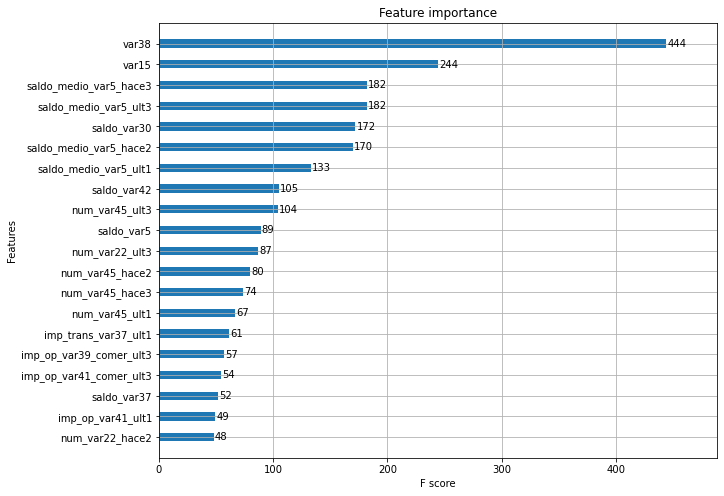

In [10]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)

xgboost의 예측 성능을 좌우하는 가장 중요한 피처는 var38, var15 순.

## 2. LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [11]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, 
            eval_metric="auc", eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],
                              average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.818903	valid_0's binary_logloss: 0.160006
[3]	valid_0's auc: 0.827707	valid_0's binary_logloss: 0.156323
[4]	valid_0's auc: 0.832155	valid_0's binary_logloss: 0.153463
[5]	valid_0's auc: 0.834677	valid_0's binary_logloss: 0.151256
[6]	valid_0's auc: 0.834093	valid_0's binary_logloss: 0.149427
[7]	valid_0's auc: 0.837046	valid_0's binary_logloss: 0.147961
[8]	valid_0's auc: 0.837838	valid_0's binary_logloss: 0.146591
[9]	valid_0's auc: 0.839435	valid_0's binary_logloss: 0.145455
[10]	valid_0's auc: 0.83973	valid_0's binary_logloss: 0.144486
[11]	valid_0's auc: 0.839799	valid_0's binary_logloss: 0.143769
[12]	valid_0's auc: 0.840034	valid_0's binary_logloss: 0.143146
[13]	valid_0's auc: 0.840271	valid_0's binary_logloss: 0.142533
[14]	valid_0's auc: 0.840342	valid_0's binary_logloss: 0.142036
[15]	valid_0's auc: 0.840928	valid_0's binary_loglos

ROC AUC: 0.8409 / ROC AUC값은 조금 줄었지만, 걸리는 시간이 단축

In [12]:
# light gbm 하이퍼 파라미터 튜닝
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves':[32,64],
          'max_depth':[128,160], 
          'min_child_weight':[60,100], 
          'subsample':[0.8,1]}

# cv는 3으로 지정
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
          eval_set=[(X_train, y_train),(X_test, y_test)])

print('GridSearchCV 최적 파라미터: ', gridcv.best_params_)

lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.822157	valid_0's binary_logloss: 0.157726	valid_1's auc: 0.816526	valid_1's binary_logloss: 0.165849
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.826695	valid_0's binary_logloss: 0.153152	valid_1's auc: 0.819615	valid_1's binary_logloss: 0.161108
[3]	valid_0's auc: 0.827769	valid_0's binary_logloss: 0.149857	valid_1's auc: 0.822314	valid_1's binary_logloss: 0.157652
[4]	valid_0's auc: 0.829846	valid_0's binary_logloss: 0.147247	valid_1's auc: 0.828805	valid_1's binary_logloss: 0.154825
[5]	valid_0's auc: 0.829927	valid_0's binary_logloss: 0.145231	valid_1's auc: 0.830265	valid_1's binary_logloss: 0.152642
[6]	valid_0's auc: 0.830507	valid_0's binary_logloss: 0.143496	valid_1's auc: 0.831934	valid_1's binary_logloss: 0.150751
[7]	valid_0's auc: 0.831121	valid_0's binary_logloss: 0.142128	valid_1's auc: 0.833023	valid_1's binary_logloss: 0.149278
[8]	valid_0's auc: 0.832405	valid_0's binary_logloss: 0.140948	valid_1's auc: 0.83331

[78]	valid_0's auc: 0.851294	valid_0's binary_logloss: 0.130033	valid_1's auc: 0.838315	valid_1's binary_logloss: 0.140182
[79]	valid_0's auc: 0.851421	valid_0's binary_logloss: 0.13	valid_1's auc: 0.838166	valid_1's binary_logloss: 0.140207
[80]	valid_0's auc: 0.851485	valid_0's binary_logloss: 0.129978	valid_1's auc: 0.838082	valid_1's binary_logloss: 0.140223
[81]	valid_0's auc: 0.851615	valid_0's binary_logloss: 0.129939	valid_1's auc: 0.837938	valid_1's binary_logloss: 0.140245
[82]	valid_0's auc: 0.851804	valid_0's binary_logloss: 0.129895	valid_1's auc: 0.837959	valid_1's binary_logloss: 0.140233
[83]	valid_0's auc: 0.851878	valid_0's binary_logloss: 0.129857	valid_1's auc: 0.837975	valid_1's binary_logloss: 0.140206
[84]	valid_0's auc: 0.852025	valid_0's binary_logloss: 0.129824	valid_1's auc: 0.837886	valid_1's binary_logloss: 0.140216
[85]	valid_0's auc: 0.852152	valid_0's binary_logloss: 0.129793	valid_1's auc: 0.837874	valid_1's binary_logloss: 0.140225
[86]	valid_0's auc: 

[48]	valid_0's auc: 0.847564	valid_0's binary_logloss: 0.131042	valid_1's auc: 0.839223	valid_1's binary_logloss: 0.139677
[49]	valid_0's auc: 0.847904	valid_0's binary_logloss: 0.130962	valid_1's auc: 0.839429	valid_1's binary_logloss: 0.139667
[50]	valid_0's auc: 0.848303	valid_0's binary_logloss: 0.130884	valid_1's auc: 0.839527	valid_1's binary_logloss: 0.139683
[51]	valid_0's auc: 0.84853	valid_0's binary_logloss: 0.130819	valid_1's auc: 0.839501	valid_1's binary_logloss: 0.139685
[52]	valid_0's auc: 0.848702	valid_0's binary_logloss: 0.130779	valid_1's auc: 0.839667	valid_1's binary_logloss: 0.139658
[53]	valid_0's auc: 0.848869	valid_0's binary_logloss: 0.130733	valid_1's auc: 0.839711	valid_1's binary_logloss: 0.139627
[54]	valid_0's auc: 0.849035	valid_0's binary_logloss: 0.130688	valid_1's auc: 0.839834	valid_1's binary_logloss: 0.139611
[55]	valid_0's auc: 0.84913	valid_0's binary_logloss: 0.130645	valid_1's auc: 0.839644	valid_1's binary_logloss: 0.139658
[56]	valid_0's auc

[122]	valid_0's auc: 0.857816	valid_0's binary_logloss: 0.128133	valid_1's auc: 0.841454	valid_1's binary_logloss: 0.139155
[123]	valid_0's auc: 0.857842	valid_0's binary_logloss: 0.128116	valid_1's auc: 0.841371	valid_1's binary_logloss: 0.139171
Early stopping, best iteration is:
[93]	valid_0's auc: 0.854941	valid_0's binary_logloss: 0.128993	valid_1's auc: 0.842078	valid_1's binary_logloss: 0.13904
[1]	valid_0's auc: 0.819377	valid_0's binary_logloss: 0.158064	valid_1's auc: 0.820067	valid_1's binary_logloss: 0.16611
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82299	valid_0's binary_logloss: 0.153582	valid_1's auc: 0.821755	valid_1's binary_logloss: 0.161349
[3]	valid_0's auc: 0.826669	valid_0's binary_logloss: 0.150072	valid_1's auc: 0.824958	valid_1's binary_logloss: 0.157662
[4]	valid_0's auc: 0.829423	valid_0's binary_logloss: 0.147318	valid_1's auc: 0.827169	valid_1's binary_logloss: 0.154836
[5]	valid_0's auc: 0.831251	valid_0's binary_log

[75]	valid_0's auc: 0.852122	valid_0's binary_logloss: 0.129737	valid_1's auc: 0.837855	valid_1's binary_logloss: 0.139765
[76]	valid_0's auc: 0.852261	valid_0's binary_logloss: 0.1297	valid_1's auc: 0.837675	valid_1's binary_logloss: 0.13981
[77]	valid_0's auc: 0.852439	valid_0's binary_logloss: 0.129652	valid_1's auc: 0.837671	valid_1's binary_logloss: 0.139794
[78]	valid_0's auc: 0.852604	valid_0's binary_logloss: 0.129604	valid_1's auc: 0.837594	valid_1's binary_logloss: 0.139822
[79]	valid_0's auc: 0.852785	valid_0's binary_logloss: 0.12955	valid_1's auc: 0.837623	valid_1's binary_logloss: 0.139833
[80]	valid_0's auc: 0.852947	valid_0's binary_logloss: 0.129503	valid_1's auc: 0.837818	valid_1's binary_logloss: 0.139795
[81]	valid_0's auc: 0.853024	valid_0's binary_logloss: 0.129477	valid_1's auc: 0.837723	valid_1's binary_logloss: 0.139812
[82]	valid_0's auc: 0.853185	valid_0's binary_logloss: 0.129438	valid_1's auc: 0.837855	valid_1's binary_logloss: 0.139802
[83]	valid_0's auc: 

[18]	valid_0's auc: 0.836846	valid_0's binary_logloss: 0.135121	valid_1's auc: 0.834816	valid_1's binary_logloss: 0.142471
[19]	valid_0's auc: 0.837163	valid_0's binary_logloss: 0.134832	valid_1's auc: 0.834467	valid_1's binary_logloss: 0.142267
[20]	valid_0's auc: 0.837332	valid_0's binary_logloss: 0.134584	valid_1's auc: 0.834691	valid_1's binary_logloss: 0.142048
[21]	valid_0's auc: 0.837547	valid_0's binary_logloss: 0.134363	valid_1's auc: 0.83492	valid_1's binary_logloss: 0.141876
[22]	valid_0's auc: 0.838003	valid_0's binary_logloss: 0.134146	valid_1's auc: 0.834972	valid_1's binary_logloss: 0.141696
[23]	valid_0's auc: 0.838217	valid_0's binary_logloss: 0.133972	valid_1's auc: 0.834809	valid_1's binary_logloss: 0.14164
[24]	valid_0's auc: 0.838609	valid_0's binary_logloss: 0.133791	valid_1's auc: 0.834649	valid_1's binary_logloss: 0.141548
[25]	valid_0's auc: 0.839177	valid_0's binary_logloss: 0.133625	valid_1's auc: 0.835096	valid_1's binary_logloss: 0.141409
[26]	valid_0's auc

[93]	valid_0's auc: 0.853237	valid_0's binary_logloss: 0.129506	valid_1's auc: 0.838293	valid_1's binary_logloss: 0.140122
[94]	valid_0's auc: 0.853389	valid_0's binary_logloss: 0.129454	valid_1's auc: 0.838327	valid_1's binary_logloss: 0.140104
[95]	valid_0's auc: 0.853504	valid_0's binary_logloss: 0.129424	valid_1's auc: 0.838217	valid_1's binary_logloss: 0.140129
[96]	valid_0's auc: 0.85362	valid_0's binary_logloss: 0.129388	valid_1's auc: 0.838289	valid_1's binary_logloss: 0.140112
[97]	valid_0's auc: 0.853736	valid_0's binary_logloss: 0.12936	valid_1's auc: 0.838417	valid_1's binary_logloss: 0.140106
[98]	valid_0's auc: 0.853804	valid_0's binary_logloss: 0.129337	valid_1's auc: 0.838346	valid_1's binary_logloss: 0.140106
[99]	valid_0's auc: 0.853926	valid_0's binary_logloss: 0.129306	valid_1's auc: 0.838354	valid_1's binary_logloss: 0.140106
[100]	valid_0's auc: 0.854047	valid_0's binary_logloss: 0.129272	valid_1's auc: 0.838463	valid_1's binary_logloss: 0.140084
[101]	valid_0's a

[61]	valid_0's auc: 0.850161	valid_0's binary_logloss: 0.130345	valid_1's auc: 0.84041	valid_1's binary_logloss: 0.139534
[62]	valid_0's auc: 0.850359	valid_0's binary_logloss: 0.130309	valid_1's auc: 0.840657	valid_1's binary_logloss: 0.139502
[63]	valid_0's auc: 0.850569	valid_0's binary_logloss: 0.130248	valid_1's auc: 0.840693	valid_1's binary_logloss: 0.139468
[64]	valid_0's auc: 0.850765	valid_0's binary_logloss: 0.130194	valid_1's auc: 0.840932	valid_1's binary_logloss: 0.139416
[65]	valid_0's auc: 0.850954	valid_0's binary_logloss: 0.130146	valid_1's auc: 0.841115	valid_1's binary_logloss: 0.139392
[66]	valid_0's auc: 0.851093	valid_0's binary_logloss: 0.130098	valid_1's auc: 0.841393	valid_1's binary_logloss: 0.139323
[67]	valid_0's auc: 0.851232	valid_0's binary_logloss: 0.130051	valid_1's auc: 0.841553	valid_1's binary_logloss: 0.139276
[68]	valid_0's auc: 0.851503	valid_0's binary_logloss: 0.129989	valid_1's auc: 0.841664	valid_1's binary_logloss: 0.139227
[69]	valid_0's au

[20]	valid_0's auc: 0.838103	valid_0's binary_logloss: 0.134357	valid_1's auc: 0.833248	valid_1's binary_logloss: 0.141939
[21]	valid_0's auc: 0.838482	valid_0's binary_logloss: 0.134106	valid_1's auc: 0.833427	valid_1's binary_logloss: 0.141744
[22]	valid_0's auc: 0.838748	valid_0's binary_logloss: 0.13392	valid_1's auc: 0.83357	valid_1's binary_logloss: 0.141556
[23]	valid_0's auc: 0.839562	valid_0's binary_logloss: 0.133672	valid_1's auc: 0.834147	valid_1's binary_logloss: 0.141345
[24]	valid_0's auc: 0.839905	valid_0's binary_logloss: 0.133502	valid_1's auc: 0.834364	valid_1's binary_logloss: 0.141275
[25]	valid_0's auc: 0.840305	valid_0's binary_logloss: 0.13333	valid_1's auc: 0.834688	valid_1's binary_logloss: 0.141131
[26]	valid_0's auc: 0.840831	valid_0's binary_logloss: 0.133157	valid_1's auc: 0.835006	valid_1's binary_logloss: 0.141014
[27]	valid_0's auc: 0.841337	valid_0's binary_logloss: 0.132986	valid_1's auc: 0.835407	valid_1's binary_logloss: 0.140878
[28]	valid_0's auc:

[88]	valid_0's auc: 0.854014	valid_0's binary_logloss: 0.129217	valid_1's auc: 0.837858	valid_1's binary_logloss: 0.13975
[89]	valid_0's auc: 0.854153	valid_0's binary_logloss: 0.12917	valid_1's auc: 0.83804	valid_1's binary_logloss: 0.139704
[90]	valid_0's auc: 0.854316	valid_0's binary_logloss: 0.129128	valid_1's auc: 0.837936	valid_1's binary_logloss: 0.13972
[91]	valid_0's auc: 0.854382	valid_0's binary_logloss: 0.1291	valid_1's auc: 0.837917	valid_1's binary_logloss: 0.13973
[92]	valid_0's auc: 0.854487	valid_0's binary_logloss: 0.129073	valid_1's auc: 0.837934	valid_1's binary_logloss: 0.139721
[93]	valid_0's auc: 0.854678	valid_0's binary_logloss: 0.129028	valid_1's auc: 0.837825	valid_1's binary_logloss: 0.139748
[94]	valid_0's auc: 0.854854	valid_0's binary_logloss: 0.128976	valid_1's auc: 0.837947	valid_1's binary_logloss: 0.139737
[95]	valid_0's auc: 0.855001	valid_0's binary_logloss: 0.128942	valid_1's auc: 0.838066	valid_1's binary_logloss: 0.139689
[96]	valid_0's auc: 0.8

[31]	valid_0's auc: 0.841397	valid_0's binary_logloss: 0.132822	valid_1's auc: 0.836343	valid_1's binary_logloss: 0.1409
[32]	valid_0's auc: 0.841749	valid_0's binary_logloss: 0.132728	valid_1's auc: 0.836311	valid_1's binary_logloss: 0.140911
[33]	valid_0's auc: 0.842046	valid_0's binary_logloss: 0.132618	valid_1's auc: 0.836342	valid_1's binary_logloss: 0.140855
[34]	valid_0's auc: 0.842343	valid_0's binary_logloss: 0.132514	valid_1's auc: 0.836285	valid_1's binary_logloss: 0.14084
[35]	valid_0's auc: 0.842554	valid_0's binary_logloss: 0.132448	valid_1's auc: 0.836274	valid_1's binary_logloss: 0.140782
[36]	valid_0's auc: 0.842908	valid_0's binary_logloss: 0.132349	valid_1's auc: 0.836298	valid_1's binary_logloss: 0.14079
[37]	valid_0's auc: 0.843266	valid_0's binary_logloss: 0.132254	valid_1's auc: 0.836539	valid_1's binary_logloss: 0.140748
[38]	valid_0's auc: 0.843633	valid_0's binary_logloss: 0.132183	valid_1's auc: 0.836705	valid_1's binary_logloss: 0.14069
[39]	valid_0's auc: 0

[103]	valid_0's auc: 0.854354	valid_0's binary_logloss: 0.129178	valid_1's auc: 0.838211	valid_1's binary_logloss: 0.140128
[104]	valid_0's auc: 0.854543	valid_0's binary_logloss: 0.12912	valid_1's auc: 0.838287	valid_1's binary_logloss: 0.140124
[105]	valid_0's auc: 0.854723	valid_0's binary_logloss: 0.129073	valid_1's auc: 0.838316	valid_1's binary_logloss: 0.14013
Early stopping, best iteration is:
[75]	valid_0's auc: 0.850862	valid_0's binary_logloss: 0.130162	valid_1's auc: 0.838609	valid_1's binary_logloss: 0.140123
[1]	valid_0's auc: 0.818729	valid_0's binary_logloss: 0.158062	valid_1's auc: 0.816984	valid_1's binary_logloss: 0.166065
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.821416	valid_0's binary_logloss: 0.153643	valid_1's auc: 0.818134	valid_1's binary_logloss: 0.161421
[3]	valid_0's auc: 0.827354	valid_0's binary_logloss: 0.150222	valid_1's auc: 0.823692	valid_1's binary_logloss: 0.157944
[4]	valid_0's auc: 0.829445	valid_0's binary_

[68]	valid_0's auc: 0.851503	valid_0's binary_logloss: 0.129989	valid_1's auc: 0.841664	valid_1's binary_logloss: 0.139227
[69]	valid_0's auc: 0.851675	valid_0's binary_logloss: 0.129926	valid_1's auc: 0.841764	valid_1's binary_logloss: 0.139177
[70]	valid_0's auc: 0.851792	valid_0's binary_logloss: 0.129888	valid_1's auc: 0.841539	valid_1's binary_logloss: 0.139224
[71]	valid_0's auc: 0.851924	valid_0's binary_logloss: 0.129851	valid_1's auc: 0.841562	valid_1's binary_logloss: 0.139222
[72]	valid_0's auc: 0.852126	valid_0's binary_logloss: 0.129808	valid_1's auc: 0.841611	valid_1's binary_logloss: 0.139213
[73]	valid_0's auc: 0.852259	valid_0's binary_logloss: 0.129776	valid_1's auc: 0.841687	valid_1's binary_logloss: 0.139166
[74]	valid_0's auc: 0.85237	valid_0's binary_logloss: 0.129739	valid_1's auc: 0.841793	valid_1's binary_logloss: 0.139149
[75]	valid_0's auc: 0.852534	valid_0's binary_logloss: 0.129694	valid_1's auc: 0.841836	valid_1's binary_logloss: 0.139147
[76]	valid_0's au

[14]	valid_0's auc: 0.835741	valid_0's binary_logloss: 0.136464	valid_1's auc: 0.833784	valid_1's binary_logloss: 0.143705
[15]	valid_0's auc: 0.836156	valid_0's binary_logloss: 0.135992	valid_1's auc: 0.833642	valid_1's binary_logloss: 0.143278
[16]	valid_0's auc: 0.836422	valid_0's binary_logloss: 0.135621	valid_1's auc: 0.832992	valid_1's binary_logloss: 0.142999
[17]	valid_0's auc: 0.836995	valid_0's binary_logloss: 0.135219	valid_1's auc: 0.832952	valid_1's binary_logloss: 0.142656
[18]	valid_0's auc: 0.83747	valid_0's binary_logloss: 0.134889	valid_1's auc: 0.833167	valid_1's binary_logloss: 0.142406
[19]	valid_0's auc: 0.83786	valid_0's binary_logloss: 0.134594	valid_1's auc: 0.832908	valid_1's binary_logloss: 0.142165
[20]	valid_0's auc: 0.838103	valid_0's binary_logloss: 0.134357	valid_1's auc: 0.833248	valid_1's binary_logloss: 0.141939
[21]	valid_0's auc: 0.838482	valid_0's binary_logloss: 0.134106	valid_1's auc: 0.833427	valid_1's binary_logloss: 0.141744
[22]	valid_0's auc

[94]	valid_0's auc: 0.854854	valid_0's binary_logloss: 0.128976	valid_1's auc: 0.837947	valid_1's binary_logloss: 0.139737
[95]	valid_0's auc: 0.855001	valid_0's binary_logloss: 0.128942	valid_1's auc: 0.838066	valid_1's binary_logloss: 0.139689
[96]	valid_0's auc: 0.855107	valid_0's binary_logloss: 0.128908	valid_1's auc: 0.837991	valid_1's binary_logloss: 0.139683
[97]	valid_0's auc: 0.855244	valid_0's binary_logloss: 0.128871	valid_1's auc: 0.837894	valid_1's binary_logloss: 0.139711
[98]	valid_0's auc: 0.855382	valid_0's binary_logloss: 0.128822	valid_1's auc: 0.8378	valid_1's binary_logloss: 0.139727
[99]	valid_0's auc: 0.855435	valid_0's binary_logloss: 0.128806	valid_1's auc: 0.837794	valid_1's binary_logloss: 0.139721
[100]	valid_0's auc: 0.855502	valid_0's binary_logloss: 0.128781	valid_1's auc: 0.83783	valid_1's binary_logloss: 0.139719
[101]	valid_0's auc: 0.855763	valid_0's binary_logloss: 0.128725	valid_1's auc: 0.837937	valid_1's binary_logloss: 0.139705
[102]	valid_0's a

[46]	valid_0's auc: 0.845834	valid_0's binary_logloss: 0.131568	valid_1's auc: 0.837714	valid_1's binary_logloss: 0.140461
[47]	valid_0's auc: 0.846032	valid_0's binary_logloss: 0.131505	valid_1's auc: 0.837577	valid_1's binary_logloss: 0.140483
[48]	valid_0's auc: 0.84627	valid_0's binary_logloss: 0.131431	valid_1's auc: 0.837404	valid_1's binary_logloss: 0.140495
[49]	valid_0's auc: 0.846441	valid_0's binary_logloss: 0.131384	valid_1's auc: 0.837361	valid_1's binary_logloss: 0.14051
[50]	valid_0's auc: 0.846618	valid_0's binary_logloss: 0.131329	valid_1's auc: 0.83742	valid_1's binary_logloss: 0.140485
[51]	valid_0's auc: 0.846778	valid_0's binary_logloss: 0.131283	valid_1's auc: 0.837408	valid_1's binary_logloss: 0.140459
[52]	valid_0's auc: 0.846996	valid_0's binary_logloss: 0.131229	valid_1's auc: 0.837383	valid_1's binary_logloss: 0.140444
[53]	valid_0's auc: 0.847209	valid_0's binary_logloss: 0.131158	valid_1's auc: 0.837503	valid_1's binary_logloss: 0.140397
[54]	valid_0's auc:

[14]	valid_0's auc: 0.836774	valid_0's binary_logloss: 0.13644	valid_1's auc: 0.834086	valid_1's binary_logloss: 0.143585
[15]	valid_0's auc: 0.837389	valid_0's binary_logloss: 0.135948	valid_1's auc: 0.834072	valid_1's binary_logloss: 0.143196
[16]	valid_0's auc: 0.837709	valid_0's binary_logloss: 0.135516	valid_1's auc: 0.834658	valid_1's binary_logloss: 0.142767
[17]	valid_0's auc: 0.838025	valid_0's binary_logloss: 0.135143	valid_1's auc: 0.834725	valid_1's binary_logloss: 0.142449
[18]	valid_0's auc: 0.838197	valid_0's binary_logloss: 0.134846	valid_1's auc: 0.834806	valid_1's binary_logloss: 0.142223
[19]	valid_0's auc: 0.838562	valid_0's binary_logloss: 0.134531	valid_1's auc: 0.834833	valid_1's binary_logloss: 0.141973
[20]	valid_0's auc: 0.838952	valid_0's binary_logloss: 0.134226	valid_1's auc: 0.835321	valid_1's binary_logloss: 0.141668
[21]	valid_0's auc: 0.839489	valid_0's binary_logloss: 0.133959	valid_1's auc: 0.835433	valid_1's binary_logloss: 0.141424
[22]	valid_0's au

[91]	valid_0's auc: 0.854728	valid_0's binary_logloss: 0.129064	valid_1's auc: 0.841933	valid_1's binary_logloss: 0.13904
[92]	valid_0's auc: 0.854863	valid_0's binary_logloss: 0.129025	valid_1's auc: 0.841986	valid_1's binary_logloss: 0.139047
[93]	valid_0's auc: 0.854941	valid_0's binary_logloss: 0.128993	valid_1's auc: 0.842078	valid_1's binary_logloss: 0.13904
[94]	valid_0's auc: 0.855061	valid_0's binary_logloss: 0.128955	valid_1's auc: 0.84198	valid_1's binary_logloss: 0.139086
[95]	valid_0's auc: 0.855152	valid_0's binary_logloss: 0.128925	valid_1's auc: 0.842062	valid_1's binary_logloss: 0.139058
[96]	valid_0's auc: 0.855236	valid_0's binary_logloss: 0.128897	valid_1's auc: 0.841963	valid_1's binary_logloss: 0.139072
[97]	valid_0's auc: 0.855356	valid_0's binary_logloss: 0.128855	valid_1's auc: 0.841949	valid_1's binary_logloss: 0.139051
[98]	valid_0's auc: 0.855517	valid_0's binary_logloss: 0.128819	valid_1's auc: 0.841886	valid_1's binary_logloss: 0.139074
[99]	valid_0's auc:

[43]	valid_0's auc: 0.846283	valid_0's binary_logloss: 0.131406	valid_1's auc: 0.836488	valid_1's binary_logloss: 0.140256
[44]	valid_0's auc: 0.846564	valid_0's binary_logloss: 0.13133	valid_1's auc: 0.836877	valid_1's binary_logloss: 0.140166
[45]	valid_0's auc: 0.846713	valid_0's binary_logloss: 0.131272	valid_1's auc: 0.836894	valid_1's binary_logloss: 0.140131
[46]	valid_0's auc: 0.847032	valid_0's binary_logloss: 0.131198	valid_1's auc: 0.837039	valid_1's binary_logloss: 0.140107
[47]	valid_0's auc: 0.847279	valid_0's binary_logloss: 0.13113	valid_1's auc: 0.837212	valid_1's binary_logloss: 0.140085
[48]	valid_0's auc: 0.847569	valid_0's binary_logloss: 0.131054	valid_1's auc: 0.83732	valid_1's binary_logloss: 0.140055
[49]	valid_0's auc: 0.847682	valid_0's binary_logloss: 0.131008	valid_1's auc: 0.837278	valid_1's binary_logloss: 0.140031
[50]	valid_0's auc: 0.8479	valid_0's binary_logloss: 0.130946	valid_1's auc: 0.837621	valid_1's binary_logloss: 0.139951
[51]	valid_0's auc: 0

[118]	valid_0's auc: 0.857669	valid_0's binary_logloss: 0.12818	valid_1's auc: 0.837715	valid_1's binary_logloss: 0.139747
[119]	valid_0's auc: 0.857822	valid_0's binary_logloss: 0.128146	valid_1's auc: 0.8376	valid_1's binary_logloss: 0.139774
[120]	valid_0's auc: 0.857944	valid_0's binary_logloss: 0.128111	valid_1's auc: 0.837605	valid_1's binary_logloss: 0.139783
[121]	valid_0's auc: 0.858101	valid_0's binary_logloss: 0.128078	valid_1's auc: 0.837577	valid_1's binary_logloss: 0.139788
[122]	valid_0's auc: 0.858176	valid_0's binary_logloss: 0.128052	valid_1's auc: 0.837562	valid_1's binary_logloss: 0.139777
[123]	valid_0's auc: 0.858213	valid_0's binary_logloss: 0.128035	valid_1's auc: 0.837407	valid_1's binary_logloss: 0.139795
[124]	valid_0's auc: 0.858303	valid_0's binary_logloss: 0.128004	valid_1's auc: 0.83752	valid_1's binary_logloss: 0.139786
[125]	valid_0's auc: 0.858412	valid_0's binary_logloss: 0.12797	valid_1's auc: 0.837519	valid_1's binary_logloss: 0.139785
Early stoppin

[62]	valid_0's auc: 0.841191	valid_0's binary_logloss: 0.132745	valid_1's auc: 0.837277	valid_1's binary_logloss: 0.140753
[63]	valid_0's auc: 0.841352	valid_0's binary_logloss: 0.132702	valid_1's auc: 0.837232	valid_1's binary_logloss: 0.140738
[64]	valid_0's auc: 0.841433	valid_0's binary_logloss: 0.132671	valid_1's auc: 0.837194	valid_1's binary_logloss: 0.140727
[65]	valid_0's auc: 0.841544	valid_0's binary_logloss: 0.132646	valid_1's auc: 0.837267	valid_1's binary_logloss: 0.140715
[66]	valid_0's auc: 0.841637	valid_0's binary_logloss: 0.132618	valid_1's auc: 0.837159	valid_1's binary_logloss: 0.140717
[67]	valid_0's auc: 0.841705	valid_0's binary_logloss: 0.132589	valid_1's auc: 0.837076	valid_1's binary_logloss: 0.14073
[68]	valid_0's auc: 0.841833	valid_0's binary_logloss: 0.132564	valid_1's auc: 0.837138	valid_1's binary_logloss: 0.140723
[69]	valid_0's auc: 0.841944	valid_0's binary_logloss: 0.132533	valid_1's auc: 0.837085	valid_1's binary_logloss: 0.14072
[70]	valid_0's auc

[137]	valid_0's auc: 0.847623	valid_0's binary_logloss: 0.13103	valid_1's auc: 0.839689	valid_1's binary_logloss: 0.139875
[138]	valid_0's auc: 0.847729	valid_0's binary_logloss: 0.131009	valid_1's auc: 0.839793	valid_1's binary_logloss: 0.139847
[139]	valid_0's auc: 0.847822	valid_0's binary_logloss: 0.13099	valid_1's auc: 0.839788	valid_1's binary_logloss: 0.139842
[140]	valid_0's auc: 0.847892	valid_0's binary_logloss: 0.13097	valid_1's auc: 0.839949	valid_1's binary_logloss: 0.139822
[141]	valid_0's auc: 0.847962	valid_0's binary_logloss: 0.130953	valid_1's auc: 0.839977	valid_1's binary_logloss: 0.139809
[142]	valid_0's auc: 0.848042	valid_0's binary_logloss: 0.130936	valid_1's auc: 0.840026	valid_1's binary_logloss: 0.13979
[143]	valid_0's auc: 0.848095	valid_0's binary_logloss: 0.130923	valid_1's auc: 0.840039	valid_1's binary_logloss: 0.13978
[144]	valid_0's auc: 0.848108	valid_0's binary_logloss: 0.130911	valid_1's auc: 0.840052	valid_1's binary_logloss: 0.139782
[145]	valid_0

[36]	valid_0's auc: 0.838056	valid_0's binary_logloss: 0.13351	valid_1's auc: 0.834351	valid_1's binary_logloss: 0.140824
[37]	valid_0's auc: 0.838239	valid_0's binary_logloss: 0.133436	valid_1's auc: 0.834529	valid_1's binary_logloss: 0.140767
[38]	valid_0's auc: 0.838447	valid_0's binary_logloss: 0.13337	valid_1's auc: 0.834792	valid_1's binary_logloss: 0.140722
[39]	valid_0's auc: 0.838839	valid_0's binary_logloss: 0.133302	valid_1's auc: 0.835092	valid_1's binary_logloss: 0.140681
[40]	valid_0's auc: 0.839013	valid_0's binary_logloss: 0.133245	valid_1's auc: 0.834973	valid_1's binary_logloss: 0.140698
[41]	valid_0's auc: 0.839208	valid_0's binary_logloss: 0.133189	valid_1's auc: 0.834978	valid_1's binary_logloss: 0.140688
[42]	valid_0's auc: 0.83933	valid_0's binary_logloss: 0.133138	valid_1's auc: 0.835087	valid_1's binary_logloss: 0.140661
[43]	valid_0's auc: 0.839531	valid_0's binary_logloss: 0.133089	valid_1's auc: 0.835347	valid_1's binary_logloss: 0.140624
[44]	valid_0's auc:

[114]	valid_0's auc: 0.84736	valid_0's binary_logloss: 0.130934	valid_1's auc: 0.840329	valid_1's binary_logloss: 0.139551
[115]	valid_0's auc: 0.847443	valid_0's binary_logloss: 0.130913	valid_1's auc: 0.840392	valid_1's binary_logloss: 0.139551
[116]	valid_0's auc: 0.847536	valid_0's binary_logloss: 0.130891	valid_1's auc: 0.8404	valid_1's binary_logloss: 0.139549
[117]	valid_0's auc: 0.847598	valid_0's binary_logloss: 0.130871	valid_1's auc: 0.840351	valid_1's binary_logloss: 0.139552
[118]	valid_0's auc: 0.847613	valid_0's binary_logloss: 0.130868	valid_1's auc: 0.840287	valid_1's binary_logloss: 0.139569
[119]	valid_0's auc: 0.847738	valid_0's binary_logloss: 0.130844	valid_1's auc: 0.840323	valid_1's binary_logloss: 0.139564
[120]	valid_0's auc: 0.84774	valid_0's binary_logloss: 0.130834	valid_1's auc: 0.840377	valid_1's binary_logloss: 0.139552
[121]	valid_0's auc: 0.847905	valid_0's binary_logloss: 0.130801	valid_1's auc: 0.840596	valid_1's binary_logloss: 0.139497
[122]	valid_

[188]	valid_0's auc: 0.851487	valid_0's binary_logloss: 0.129774	valid_1's auc: 0.841264	valid_1's binary_logloss: 0.139275
[189]	valid_0's auc: 0.85156	valid_0's binary_logloss: 0.129756	valid_1's auc: 0.841151	valid_1's binary_logloss: 0.139291
[190]	valid_0's auc: 0.851562	valid_0's binary_logloss: 0.129745	valid_1's auc: 0.841188	valid_1's binary_logloss: 0.139273
[191]	valid_0's auc: 0.851613	valid_0's binary_logloss: 0.129733	valid_1's auc: 0.841199	valid_1's binary_logloss: 0.139272
[192]	valid_0's auc: 0.851659	valid_0's binary_logloss: 0.129719	valid_1's auc: 0.841197	valid_1's binary_logloss: 0.139282
[193]	valid_0's auc: 0.851677	valid_0's binary_logloss: 0.129709	valid_1's auc: 0.841227	valid_1's binary_logloss: 0.139276
[194]	valid_0's auc: 0.851698	valid_0's binary_logloss: 0.129697	valid_1's auc: 0.841305	valid_1's binary_logloss: 0.139253
[195]	valid_0's auc: 0.85182	valid_0's binary_logloss: 0.129677	valid_1's auc: 0.841241	valid_1's binary_logloss: 0.139261
[196]	vali

[59]	valid_0's auc: 0.841226	valid_0's binary_logloss: 0.132563	valid_1's auc: 0.836255	valid_1's binary_logloss: 0.140405
[60]	valid_0's auc: 0.841339	valid_0's binary_logloss: 0.132534	valid_1's auc: 0.836344	valid_1's binary_logloss: 0.140388
[61]	valid_0's auc: 0.841429	valid_0's binary_logloss: 0.132506	valid_1's auc: 0.836299	valid_1's binary_logloss: 0.1404
[62]	valid_0's auc: 0.841656	valid_0's binary_logloss: 0.132465	valid_1's auc: 0.836562	valid_1's binary_logloss: 0.140343
[63]	valid_0's auc: 0.841765	valid_0's binary_logloss: 0.132436	valid_1's auc: 0.836615	valid_1's binary_logloss: 0.140338
[64]	valid_0's auc: 0.841843	valid_0's binary_logloss: 0.132395	valid_1's auc: 0.836592	valid_1's binary_logloss: 0.140343
[65]	valid_0's auc: 0.842019	valid_0's binary_logloss: 0.132345	valid_1's auc: 0.83667	valid_1's binary_logloss: 0.140333
[66]	valid_0's auc: 0.842186	valid_0's binary_logloss: 0.132321	valid_1's auc: 0.836723	valid_1's binary_logloss: 0.14032
[67]	valid_0's auc: 

[137]	valid_0's auc: 0.848198	valid_0's binary_logloss: 0.130723	valid_1's auc: 0.838453	valid_1's binary_logloss: 0.13984
Early stopping, best iteration is:
[107]	valid_0's auc: 0.846102	valid_0's binary_logloss: 0.131268	valid_1's auc: 0.838643	valid_1's binary_logloss: 0.139878
[1]	valid_0's auc: 0.812551	valid_0's binary_logloss: 0.158031	valid_1's auc: 0.815399	valid_1's binary_logloss: 0.166157
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.813739	valid_0's binary_logloss: 0.153685	valid_1's auc: 0.816617	valid_1's binary_logloss: 0.161548
[3]	valid_0's auc: 0.817693	valid_0's binary_logloss: 0.150667	valid_1's auc: 0.819242	valid_1's binary_logloss: 0.158388
[4]	valid_0's auc: 0.820439	valid_0's binary_logloss: 0.148267	valid_1's auc: 0.825893	valid_1's binary_logloss: 0.155724
[5]	valid_0's auc: 0.821007	valid_0's binary_logloss: 0.146353	valid_1's auc: 0.826593	valid_1's binary_logloss: 0.153671
[6]	valid_0's auc: 0.822964	valid_0's binary_lo

[79]	valid_0's auc: 0.843229	valid_0's binary_logloss: 0.132206	valid_1's auc: 0.83762	valid_1's binary_logloss: 0.140562
[80]	valid_0's auc: 0.843343	valid_0's binary_logloss: 0.132179	valid_1's auc: 0.837708	valid_1's binary_logloss: 0.140532
[81]	valid_0's auc: 0.843393	valid_0's binary_logloss: 0.132157	valid_1's auc: 0.837741	valid_1's binary_logloss: 0.140532
[82]	valid_0's auc: 0.843491	valid_0's binary_logloss: 0.132139	valid_1's auc: 0.837986	valid_1's binary_logloss: 0.140488
[83]	valid_0's auc: 0.843598	valid_0's binary_logloss: 0.132119	valid_1's auc: 0.838012	valid_1's binary_logloss: 0.140479
[84]	valid_0's auc: 0.843753	valid_0's binary_logloss: 0.132101	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.140435
[85]	valid_0's auc: 0.84387	valid_0's binary_logloss: 0.13208	valid_1's auc: 0.838241	valid_1's binary_logloss: 0.140435
[86]	valid_0's auc: 0.844012	valid_0's binary_logloss: 0.132055	valid_1's auc: 0.838208	valid_1's binary_logloss: 0.14045
[87]	valid_0's auc: 

[154]	valid_0's auc: 0.84867	valid_0's binary_logloss: 0.130767	valid_1's auc: 0.839878	valid_1's binary_logloss: 0.139798
[155]	valid_0's auc: 0.848658	valid_0's binary_logloss: 0.130759	valid_1's auc: 0.83982	valid_1's binary_logloss: 0.139814
[156]	valid_0's auc: 0.848722	valid_0's binary_logloss: 0.13074	valid_1's auc: 0.83988	valid_1's binary_logloss: 0.139803
[157]	valid_0's auc: 0.848776	valid_0's binary_logloss: 0.130725	valid_1's auc: 0.839803	valid_1's binary_logloss: 0.139824
[158]	valid_0's auc: 0.848843	valid_0's binary_logloss: 0.130708	valid_1's auc: 0.839803	valid_1's binary_logloss: 0.139804
[159]	valid_0's auc: 0.848884	valid_0's binary_logloss: 0.130696	valid_1's auc: 0.839761	valid_1's binary_logloss: 0.139821
[160]	valid_0's auc: 0.848935	valid_0's binary_logloss: 0.130681	valid_1's auc: 0.839742	valid_1's binary_logloss: 0.139827
[161]	valid_0's auc: 0.848973	valid_0's binary_logloss: 0.130666	valid_1's auc: 0.839734	valid_1's binary_logloss: 0.139831
[162]	valid_

[51]	valid_0's auc: 0.841114	valid_0's binary_logloss: 0.132668	valid_1's auc: 0.836979	valid_1's binary_logloss: 0.140309
[52]	valid_0's auc: 0.841304	valid_0's binary_logloss: 0.132622	valid_1's auc: 0.837048	valid_1's binary_logloss: 0.140285
[53]	valid_0's auc: 0.841438	valid_0's binary_logloss: 0.132589	valid_1's auc: 0.837314	valid_1's binary_logloss: 0.140242
[54]	valid_0's auc: 0.841539	valid_0's binary_logloss: 0.132557	valid_1's auc: 0.837381	valid_1's binary_logloss: 0.140222
[55]	valid_0's auc: 0.841715	valid_0's binary_logloss: 0.132527	valid_1's auc: 0.83746	valid_1's binary_logloss: 0.140222
[56]	valid_0's auc: 0.841792	valid_0's binary_logloss: 0.132485	valid_1's auc: 0.8376	valid_1's binary_logloss: 0.140191
[57]	valid_0's auc: 0.841991	valid_0's binary_logloss: 0.132444	valid_1's auc: 0.837815	valid_1's binary_logloss: 0.140159
[58]	valid_0's auc: 0.842116	valid_0's binary_logloss: 0.132415	valid_1's auc: 0.83781	valid_1's binary_logloss: 0.140167
[59]	valid_0's auc: 

[127]	valid_0's auc: 0.84824	valid_0's binary_logloss: 0.130703	valid_1's auc: 0.840524	valid_1's binary_logloss: 0.139513
[128]	valid_0's auc: 0.848341	valid_0's binary_logloss: 0.130687	valid_1's auc: 0.840662	valid_1's binary_logloss: 0.139477
[129]	valid_0's auc: 0.848367	valid_0's binary_logloss: 0.130674	valid_1's auc: 0.840698	valid_1's binary_logloss: 0.139459
[130]	valid_0's auc: 0.848464	valid_0's binary_logloss: 0.130648	valid_1's auc: 0.84077	valid_1's binary_logloss: 0.139446
[131]	valid_0's auc: 0.848506	valid_0's binary_logloss: 0.130634	valid_1's auc: 0.840821	valid_1's binary_logloss: 0.139423
[132]	valid_0's auc: 0.848563	valid_0's binary_logloss: 0.130617	valid_1's auc: 0.840893	valid_1's binary_logloss: 0.13941
[133]	valid_0's auc: 0.848615	valid_0's binary_logloss: 0.130601	valid_1's auc: 0.841009	valid_1's binary_logloss: 0.139384
[134]	valid_0's auc: 0.848649	valid_0's binary_logloss: 0.130594	valid_1's auc: 0.841045	valid_1's binary_logloss: 0.13938
[135]	valid_

[61]	valid_0's auc: 0.841429	valid_0's binary_logloss: 0.132506	valid_1's auc: 0.836299	valid_1's binary_logloss: 0.1404
[62]	valid_0's auc: 0.841656	valid_0's binary_logloss: 0.132465	valid_1's auc: 0.836562	valid_1's binary_logloss: 0.140343
[63]	valid_0's auc: 0.841765	valid_0's binary_logloss: 0.132436	valid_1's auc: 0.836615	valid_1's binary_logloss: 0.140338
[64]	valid_0's auc: 0.841843	valid_0's binary_logloss: 0.132395	valid_1's auc: 0.836592	valid_1's binary_logloss: 0.140343
[65]	valid_0's auc: 0.842019	valid_0's binary_logloss: 0.132345	valid_1's auc: 0.83667	valid_1's binary_logloss: 0.140333
[66]	valid_0's auc: 0.842186	valid_0's binary_logloss: 0.132321	valid_1's auc: 0.836723	valid_1's binary_logloss: 0.14032
[67]	valid_0's auc: 0.842207	valid_0's binary_logloss: 0.132293	valid_1's auc: 0.836693	valid_1's binary_logloss: 0.140327
[68]	valid_0's auc: 0.842375	valid_0's binary_logloss: 0.132254	valid_1's auc: 0.836728	valid_1's binary_logloss: 0.14033
[69]	valid_0's auc: 0

[129]	valid_0's auc: 0.847606	valid_0's binary_logloss: 0.130879	valid_1's auc: 0.83824	valid_1's binary_logloss: 0.13989
[130]	valid_0's auc: 0.847628	valid_0's binary_logloss: 0.130866	valid_1's auc: 0.838274	valid_1's binary_logloss: 0.139883
[131]	valid_0's auc: 0.847734	valid_0's binary_logloss: 0.13085	valid_1's auc: 0.838332	valid_1's binary_logloss: 0.139887
[132]	valid_0's auc: 0.847849	valid_0's binary_logloss: 0.130821	valid_1's auc: 0.838324	valid_1's binary_logloss: 0.139879
[133]	valid_0's auc: 0.847822	valid_0's binary_logloss: 0.130813	valid_1's auc: 0.838326	valid_1's binary_logloss: 0.139875
[134]	valid_0's auc: 0.847907	valid_0's binary_logloss: 0.130792	valid_1's auc: 0.838377	valid_1's binary_logloss: 0.139866
[135]	valid_0's auc: 0.847958	valid_0's binary_logloss: 0.130773	valid_1's auc: 0.838334	valid_1's binary_logloss: 0.139877
[136]	valid_0's auc: 0.848057	valid_0's binary_logloss: 0.130755	valid_1's auc: 0.838368	valid_1's binary_logloss: 0.13986
[137]	valid_

[58]	valid_0's auc: 0.840655	valid_0's binary_logloss: 0.132892	valid_1's auc: 0.837173	valid_1's binary_logloss: 0.140801
[59]	valid_0's auc: 0.840825	valid_0's binary_logloss: 0.132846	valid_1's auc: 0.837198	valid_1's binary_logloss: 0.140781
[60]	valid_0's auc: 0.840961	valid_0's binary_logloss: 0.132814	valid_1's auc: 0.837229	valid_1's binary_logloss: 0.140765
[61]	valid_0's auc: 0.841033	valid_0's binary_logloss: 0.132786	valid_1's auc: 0.837212	valid_1's binary_logloss: 0.140774
[62]	valid_0's auc: 0.841191	valid_0's binary_logloss: 0.132745	valid_1's auc: 0.837277	valid_1's binary_logloss: 0.140753
[63]	valid_0's auc: 0.841352	valid_0's binary_logloss: 0.132702	valid_1's auc: 0.837232	valid_1's binary_logloss: 0.140738
[64]	valid_0's auc: 0.841433	valid_0's binary_logloss: 0.132671	valid_1's auc: 0.837194	valid_1's binary_logloss: 0.140727
[65]	valid_0's auc: 0.841544	valid_0's binary_logloss: 0.132646	valid_1's auc: 0.837267	valid_1's binary_logloss: 0.140715
[66]	valid_0's a

[134]	valid_0's auc: 0.847464	valid_0's binary_logloss: 0.131083	valid_1's auc: 0.83957	valid_1's binary_logloss: 0.139899
[135]	valid_0's auc: 0.847511	valid_0's binary_logloss: 0.131067	valid_1's auc: 0.839572	valid_1's binary_logloss: 0.139903
[136]	valid_0's auc: 0.847589	valid_0's binary_logloss: 0.131046	valid_1's auc: 0.839699	valid_1's binary_logloss: 0.139871
[137]	valid_0's auc: 0.847623	valid_0's binary_logloss: 0.13103	valid_1's auc: 0.839689	valid_1's binary_logloss: 0.139875
[138]	valid_0's auc: 0.847729	valid_0's binary_logloss: 0.131009	valid_1's auc: 0.839793	valid_1's binary_logloss: 0.139847
[139]	valid_0's auc: 0.847822	valid_0's binary_logloss: 0.13099	valid_1's auc: 0.839788	valid_1's binary_logloss: 0.139842
[140]	valid_0's auc: 0.847892	valid_0's binary_logloss: 0.13097	valid_1's auc: 0.839949	valid_1's binary_logloss: 0.139822
[141]	valid_0's auc: 0.847962	valid_0's binary_logloss: 0.130953	valid_1's auc: 0.839977	valid_1's binary_logloss: 0.139809
[142]	valid_

[39]	valid_0's auc: 0.838839	valid_0's binary_logloss: 0.133302	valid_1's auc: 0.835092	valid_1's binary_logloss: 0.140681
[40]	valid_0's auc: 0.839013	valid_0's binary_logloss: 0.133245	valid_1's auc: 0.834973	valid_1's binary_logloss: 0.140698
[41]	valid_0's auc: 0.839208	valid_0's binary_logloss: 0.133189	valid_1's auc: 0.834978	valid_1's binary_logloss: 0.140688
[42]	valid_0's auc: 0.83933	valid_0's binary_logloss: 0.133138	valid_1's auc: 0.835087	valid_1's binary_logloss: 0.140661
[43]	valid_0's auc: 0.839531	valid_0's binary_logloss: 0.133089	valid_1's auc: 0.835347	valid_1's binary_logloss: 0.140624
[44]	valid_0's auc: 0.839749	valid_0's binary_logloss: 0.13304	valid_1's auc: 0.835502	valid_1's binary_logloss: 0.14061
[45]	valid_0's auc: 0.840107	valid_0's binary_logloss: 0.132985	valid_1's auc: 0.835925	valid_1's binary_logloss: 0.140565
[46]	valid_0's auc: 0.840297	valid_0's binary_logloss: 0.132922	valid_1's auc: 0.83625	valid_1's binary_logloss: 0.140492
[47]	valid_0's auc: 

[184]	valid_0's auc: 0.851272	valid_0's binary_logloss: 0.129834	valid_1's auc: 0.841373	valid_1's binary_logloss: 0.139268
[185]	valid_0's auc: 0.851282	valid_0's binary_logloss: 0.129826	valid_1's auc: 0.841236	valid_1's binary_logloss: 0.139293
[186]	valid_0's auc: 0.851294	valid_0's binary_logloss: 0.129811	valid_1's auc: 0.841213	valid_1's binary_logloss: 0.139288
[187]	valid_0's auc: 0.851423	valid_0's binary_logloss: 0.12979	valid_1's auc: 0.841173	valid_1's binary_logloss: 0.139297
[188]	valid_0's auc: 0.851487	valid_0's binary_logloss: 0.129774	valid_1's auc: 0.841264	valid_1's binary_logloss: 0.139275
[189]	valid_0's auc: 0.85156	valid_0's binary_logloss: 0.129756	valid_1's auc: 0.841151	valid_1's binary_logloss: 0.139291
[190]	valid_0's auc: 0.851562	valid_0's binary_logloss: 0.129745	valid_1's auc: 0.841188	valid_1's binary_logloss: 0.139273
[191]	valid_0's auc: 0.851613	valid_0's binary_logloss: 0.129733	valid_1's auc: 0.841199	valid_1's binary_logloss: 0.139272
[192]	vali

[56]	valid_0's auc: 0.840867	valid_0's binary_logloss: 0.132663	valid_1's auc: 0.836189	valid_1's binary_logloss: 0.140449
[57]	valid_0's auc: 0.840971	valid_0's binary_logloss: 0.13263	valid_1's auc: 0.836185	valid_1's binary_logloss: 0.14043
[58]	valid_0's auc: 0.841161	valid_0's binary_logloss: 0.132586	valid_1's auc: 0.836254	valid_1's binary_logloss: 0.140415
[59]	valid_0's auc: 0.841226	valid_0's binary_logloss: 0.132563	valid_1's auc: 0.836255	valid_1's binary_logloss: 0.140405
[60]	valid_0's auc: 0.841339	valid_0's binary_logloss: 0.132534	valid_1's auc: 0.836344	valid_1's binary_logloss: 0.140388
[61]	valid_0's auc: 0.841429	valid_0's binary_logloss: 0.132506	valid_1's auc: 0.836299	valid_1's binary_logloss: 0.1404
[62]	valid_0's auc: 0.841656	valid_0's binary_logloss: 0.132465	valid_1's auc: 0.836562	valid_1's binary_logloss: 0.140343
[63]	valid_0's auc: 0.841765	valid_0's binary_logloss: 0.132436	valid_1's auc: 0.836615	valid_1's binary_logloss: 0.140338
[64]	valid_0's auc: 

[132]	valid_0's auc: 0.847849	valid_0's binary_logloss: 0.130821	valid_1's auc: 0.838324	valid_1's binary_logloss: 0.139879
[133]	valid_0's auc: 0.847822	valid_0's binary_logloss: 0.130813	valid_1's auc: 0.838326	valid_1's binary_logloss: 0.139875
[134]	valid_0's auc: 0.847907	valid_0's binary_logloss: 0.130792	valid_1's auc: 0.838377	valid_1's binary_logloss: 0.139866
[135]	valid_0's auc: 0.847958	valid_0's binary_logloss: 0.130773	valid_1's auc: 0.838334	valid_1's binary_logloss: 0.139877
[136]	valid_0's auc: 0.848057	valid_0's binary_logloss: 0.130755	valid_1's auc: 0.838368	valid_1's binary_logloss: 0.13986
[137]	valid_0's auc: 0.848198	valid_0's binary_logloss: 0.130723	valid_1's auc: 0.838453	valid_1's binary_logloss: 0.13984
Early stopping, best iteration is:
[107]	valid_0's auc: 0.846102	valid_0's binary_logloss: 0.131268	valid_1's auc: 0.838643	valid_1's binary_logloss: 0.139878
[1]	valid_0's auc: 0.812551	valid_0's binary_logloss: 0.158031	valid_1's auc: 0.815399	valid_1's bi

[70]	valid_0's auc: 0.842115	valid_0's binary_logloss: 0.132498	valid_1's auc: 0.837276	valid_1's binary_logloss: 0.140675
[71]	valid_0's auc: 0.842269	valid_0's binary_logloss: 0.132452	valid_1's auc: 0.837473	valid_1's binary_logloss: 0.140644
[72]	valid_0's auc: 0.8425	valid_0's binary_logloss: 0.132389	valid_1's auc: 0.837617	valid_1's binary_logloss: 0.140608
[73]	valid_0's auc: 0.842566	valid_0's binary_logloss: 0.132366	valid_1's auc: 0.837527	valid_1's binary_logloss: 0.140599
[74]	valid_0's auc: 0.842654	valid_0's binary_logloss: 0.132337	valid_1's auc: 0.837456	valid_1's binary_logloss: 0.1406
[75]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.132295	valid_1's auc: 0.837407	valid_1's binary_logloss: 0.140605
[76]	valid_0's auc: 0.842902	valid_0's binary_logloss: 0.13227	valid_1's auc: 0.837513	valid_1's binary_logloss: 0.140579
[77]	valid_0's auc: 0.842994	valid_0's binary_logloss: 0.132249	valid_1's auc: 0.837457	valid_1's binary_logloss: 0.140592
[78]	valid_0's auc: 0

[149]	valid_0's auc: 0.848382	valid_0's binary_logloss: 0.130844	valid_1's auc: 0.839988	valid_1's binary_logloss: 0.139801
[150]	valid_0's auc: 0.848441	valid_0's binary_logloss: 0.130827	valid_1's auc: 0.839995	valid_1's binary_logloss: 0.139797
[151]	valid_0's auc: 0.848514	valid_0's binary_logloss: 0.130811	valid_1's auc: 0.839983	valid_1's binary_logloss: 0.139788
[152]	valid_0's auc: 0.848578	valid_0's binary_logloss: 0.130799	valid_1's auc: 0.839982	valid_1's binary_logloss: 0.139789
[153]	valid_0's auc: 0.848578	valid_0's binary_logloss: 0.130787	valid_1's auc: 0.839921	valid_1's binary_logloss: 0.139801
[154]	valid_0's auc: 0.84867	valid_0's binary_logloss: 0.130767	valid_1's auc: 0.839878	valid_1's binary_logloss: 0.139798
[155]	valid_0's auc: 0.848658	valid_0's binary_logloss: 0.130759	valid_1's auc: 0.83982	valid_1's binary_logloss: 0.139814
[156]	valid_0's auc: 0.848722	valid_0's binary_logloss: 0.13074	valid_1's auc: 0.83988	valid_1's binary_logloss: 0.139803
[157]	valid_

[49]	valid_0's auc: 0.840734	valid_0's binary_logloss: 0.132776	valid_1's auc: 0.836546	valid_1's binary_logloss: 0.140386
[50]	valid_0's auc: 0.840981	valid_0's binary_logloss: 0.132725	valid_1's auc: 0.836785	valid_1's binary_logloss: 0.140356
[51]	valid_0's auc: 0.841114	valid_0's binary_logloss: 0.132668	valid_1's auc: 0.836979	valid_1's binary_logloss: 0.140309
[52]	valid_0's auc: 0.841304	valid_0's binary_logloss: 0.132622	valid_1's auc: 0.837048	valid_1's binary_logloss: 0.140285
[53]	valid_0's auc: 0.841438	valid_0's binary_logloss: 0.132589	valid_1's auc: 0.837314	valid_1's binary_logloss: 0.140242
[54]	valid_0's auc: 0.841539	valid_0's binary_logloss: 0.132557	valid_1's auc: 0.837381	valid_1's binary_logloss: 0.140222
[55]	valid_0's auc: 0.841715	valid_0's binary_logloss: 0.132527	valid_1's auc: 0.83746	valid_1's binary_logloss: 0.140222
[56]	valid_0's auc: 0.841792	valid_0's binary_logloss: 0.132485	valid_1's auc: 0.8376	valid_1's binary_logloss: 0.140191
[57]	valid_0's auc:

[130]	valid_0's auc: 0.848464	valid_0's binary_logloss: 0.130648	valid_1's auc: 0.84077	valid_1's binary_logloss: 0.139446
[131]	valid_0's auc: 0.848506	valid_0's binary_logloss: 0.130634	valid_1's auc: 0.840821	valid_1's binary_logloss: 0.139423
[132]	valid_0's auc: 0.848563	valid_0's binary_logloss: 0.130617	valid_1's auc: 0.840893	valid_1's binary_logloss: 0.13941
[133]	valid_0's auc: 0.848615	valid_0's binary_logloss: 0.130601	valid_1's auc: 0.841009	valid_1's binary_logloss: 0.139384
[134]	valid_0's auc: 0.848649	valid_0's binary_logloss: 0.130594	valid_1's auc: 0.841045	valid_1's binary_logloss: 0.13938
[135]	valid_0's auc: 0.848686	valid_0's binary_logloss: 0.130574	valid_1's auc: 0.841103	valid_1's binary_logloss: 0.139343
[136]	valid_0's auc: 0.848759	valid_0's binary_logloss: 0.130558	valid_1's auc: 0.840987	valid_1's binary_logloss: 0.139377
[137]	valid_0's auc: 0.848787	valid_0's binary_logloss: 0.130544	valid_1's auc: 0.840862	valid_1's binary_logloss: 0.139398
[138]	valid

[1]	valid_0's auc: 0.813315	valid_0's binary_logloss: 0.158231	valid_1's auc: 0.814304	valid_1's binary_logloss: 0.166321
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.814746	valid_0's binary_logloss: 0.153953	valid_1's auc: 0.817522	valid_1's binary_logloss: 0.161769
[3]	valid_0's auc: 0.819043	valid_0's binary_logloss: 0.15078	valid_1's auc: 0.821583	valid_1's binary_logloss: 0.158364
[4]	valid_0's auc: 0.82144	valid_0's binary_logloss: 0.148336	valid_1's auc: 0.825172	valid_1's binary_logloss: 0.15576
[5]	valid_0's auc: 0.82203	valid_0's binary_logloss: 0.14628	valid_1's auc: 0.824926	valid_1's binary_logloss: 0.153547
[6]	valid_0's auc: 0.8235	valid_0's binary_logloss: 0.144647	valid_1's auc: 0.825716	valid_1's binary_logloss: 0.151798
[7]	valid_0's auc: 0.824937	valid_0's binary_logloss: 0.14322	valid_1's auc: 0.826865	valid_1's binary_logloss: 0.150286
[8]	valid_0's auc: 0.825879	valid_0's binary_logloss: 0.141969	valid_1's auc: 0.827156	valid_

[70]	valid_0's auc: 0.842541	valid_0's binary_logloss: 0.132205	valid_1's auc: 0.836715	valid_1's binary_logloss: 0.140333
[71]	valid_0's auc: 0.842701	valid_0's binary_logloss: 0.132164	valid_1's auc: 0.836998	valid_1's binary_logloss: 0.140273
[72]	valid_0's auc: 0.84277	valid_0's binary_logloss: 0.132129	valid_1's auc: 0.837031	valid_1's binary_logloss: 0.140256
[73]	valid_0's auc: 0.842888	valid_0's binary_logloss: 0.132106	valid_1's auc: 0.837124	valid_1's binary_logloss: 0.140241
[74]	valid_0's auc: 0.84301	valid_0's binary_logloss: 0.132079	valid_1's auc: 0.837255	valid_1's binary_logloss: 0.140218
[75]	valid_0's auc: 0.843117	valid_0's binary_logloss: 0.132063	valid_1's auc: 0.837201	valid_1's binary_logloss: 0.140231
[76]	valid_0's auc: 0.843231	valid_0's binary_logloss: 0.132032	valid_1's auc: 0.8373	valid_1's binary_logloss: 0.140209
[77]	valid_0's auc: 0.84325	valid_0's binary_logloss: 0.132013	valid_1's auc: 0.837252	valid_1's binary_logloss: 0.140231
[78]	valid_0's auc: 0

[73]	valid_0's auc: 0.850646	valid_0's binary_logloss: 0.130235	valid_1's auc: 0.838578	valid_1's binary_logloss: 0.140132
[74]	valid_0's auc: 0.850738	valid_0's binary_logloss: 0.130198	valid_1's auc: 0.838575	valid_1's binary_logloss: 0.140109
[75]	valid_0's auc: 0.850862	valid_0's binary_logloss: 0.130162	valid_1's auc: 0.838609	valid_1's binary_logloss: 0.140123
[76]	valid_0's auc: 0.851006	valid_0's binary_logloss: 0.130119	valid_1's auc: 0.838509	valid_1's binary_logloss: 0.140126
[77]	valid_0's auc: 0.851092	valid_0's binary_logloss: 0.130086	valid_1's auc: 0.838399	valid_1's binary_logloss: 0.140168
[78]	valid_0's auc: 0.851294	valid_0's binary_logloss: 0.130033	valid_1's auc: 0.838315	valid_1's binary_logloss: 0.140182
[79]	valid_0's auc: 0.851421	valid_0's binary_logloss: 0.13	valid_1's auc: 0.838166	valid_1's binary_logloss: 0.140207
[80]	valid_0's auc: 0.851485	valid_0's binary_logloss: 0.129978	valid_1's auc: 0.838082	valid_1's binary_logloss: 0.140223
[81]	valid_0's auc: 

[45]	valid_0's auc: 0.846746	valid_0's binary_logloss: 0.131227	valid_1's auc: 0.838867	valid_1's binary_logloss: 0.139725
[46]	valid_0's auc: 0.847008	valid_0's binary_logloss: 0.131172	valid_1's auc: 0.838895	valid_1's binary_logloss: 0.139729
[47]	valid_0's auc: 0.847432	valid_0's binary_logloss: 0.131095	valid_1's auc: 0.839385	valid_1's binary_logloss: 0.139671
[48]	valid_0's auc: 0.847564	valid_0's binary_logloss: 0.131042	valid_1's auc: 0.839223	valid_1's binary_logloss: 0.139677
[49]	valid_0's auc: 0.847904	valid_0's binary_logloss: 0.130962	valid_1's auc: 0.839429	valid_1's binary_logloss: 0.139667
[50]	valid_0's auc: 0.848303	valid_0's binary_logloss: 0.130884	valid_1's auc: 0.839527	valid_1's binary_logloss: 0.139683
[51]	valid_0's auc: 0.84853	valid_0's binary_logloss: 0.130819	valid_1's auc: 0.839501	valid_1's binary_logloss: 0.139685
[52]	valid_0's auc: 0.848702	valid_0's binary_logloss: 0.130779	valid_1's auc: 0.839667	valid_1's binary_logloss: 0.139658
[53]	valid_0's au

[121]	valid_0's auc: 0.857697	valid_0's binary_logloss: 0.128162	valid_1's auc: 0.841597	valid_1's binary_logloss: 0.139126
[122]	valid_0's auc: 0.857816	valid_0's binary_logloss: 0.128133	valid_1's auc: 0.841454	valid_1's binary_logloss: 0.139155
[123]	valid_0's auc: 0.857842	valid_0's binary_logloss: 0.128116	valid_1's auc: 0.841371	valid_1's binary_logloss: 0.139171
Early stopping, best iteration is:
[93]	valid_0's auc: 0.854941	valid_0's binary_logloss: 0.128993	valid_1's auc: 0.842078	valid_1's binary_logloss: 0.13904
[1]	valid_0's auc: 0.819377	valid_0's binary_logloss: 0.158064	valid_1's auc: 0.820067	valid_1's binary_logloss: 0.16611
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82299	valid_0's binary_logloss: 0.153582	valid_1's auc: 0.821755	valid_1's binary_logloss: 0.161349
[3]	valid_0's auc: 0.826669	valid_0's binary_logloss: 0.150072	valid_1's auc: 0.824958	valid_1's binary_logloss: 0.157662
[4]	valid_0's auc: 0.829423	valid_0's binary_l

[75]	valid_0's auc: 0.852122	valid_0's binary_logloss: 0.129737	valid_1's auc: 0.837855	valid_1's binary_logloss: 0.139765
[76]	valid_0's auc: 0.852261	valid_0's binary_logloss: 0.1297	valid_1's auc: 0.837675	valid_1's binary_logloss: 0.13981
[77]	valid_0's auc: 0.852439	valid_0's binary_logloss: 0.129652	valid_1's auc: 0.837671	valid_1's binary_logloss: 0.139794
[78]	valid_0's auc: 0.852604	valid_0's binary_logloss: 0.129604	valid_1's auc: 0.837594	valid_1's binary_logloss: 0.139822
[79]	valid_0's auc: 0.852785	valid_0's binary_logloss: 0.12955	valid_1's auc: 0.837623	valid_1's binary_logloss: 0.139833
[80]	valid_0's auc: 0.852947	valid_0's binary_logloss: 0.129503	valid_1's auc: 0.837818	valid_1's binary_logloss: 0.139795
[81]	valid_0's auc: 0.853024	valid_0's binary_logloss: 0.129477	valid_1's auc: 0.837723	valid_1's binary_logloss: 0.139812
[82]	valid_0's auc: 0.853185	valid_0's binary_logloss: 0.129438	valid_1's auc: 0.837855	valid_1's binary_logloss: 0.139802
[83]	valid_0's auc: 

[18]	valid_0's auc: 0.836846	valid_0's binary_logloss: 0.135121	valid_1's auc: 0.834816	valid_1's binary_logloss: 0.142471
[19]	valid_0's auc: 0.837163	valid_0's binary_logloss: 0.134832	valid_1's auc: 0.834467	valid_1's binary_logloss: 0.142267
[20]	valid_0's auc: 0.837332	valid_0's binary_logloss: 0.134584	valid_1's auc: 0.834691	valid_1's binary_logloss: 0.142048
[21]	valid_0's auc: 0.837547	valid_0's binary_logloss: 0.134363	valid_1's auc: 0.83492	valid_1's binary_logloss: 0.141876
[22]	valid_0's auc: 0.838003	valid_0's binary_logloss: 0.134146	valid_1's auc: 0.834972	valid_1's binary_logloss: 0.141696
[23]	valid_0's auc: 0.838217	valid_0's binary_logloss: 0.133972	valid_1's auc: 0.834809	valid_1's binary_logloss: 0.14164
[24]	valid_0's auc: 0.838609	valid_0's binary_logloss: 0.133791	valid_1's auc: 0.834649	valid_1's binary_logloss: 0.141548
[25]	valid_0's auc: 0.839177	valid_0's binary_logloss: 0.133625	valid_1's auc: 0.835096	valid_1's binary_logloss: 0.141409
[26]	valid_0's auc

[86]	valid_0's auc: 0.852285	valid_0's binary_logloss: 0.129769	valid_1's auc: 0.837908	valid_1's binary_logloss: 0.140193
[87]	valid_0's auc: 0.852379	valid_0's binary_logloss: 0.129736	valid_1's auc: 0.837918	valid_1's binary_logloss: 0.140195
[88]	valid_0's auc: 0.852491	valid_0's binary_logloss: 0.129705	valid_1's auc: 0.837931	valid_1's binary_logloss: 0.140182
[89]	valid_0's auc: 0.852605	valid_0's binary_logloss: 0.129677	valid_1's auc: 0.837999	valid_1's binary_logloss: 0.140174
[90]	valid_0's auc: 0.852771	valid_0's binary_logloss: 0.129632	valid_1's auc: 0.837891	valid_1's binary_logloss: 0.140206
[91]	valid_0's auc: 0.852865	valid_0's binary_logloss: 0.129602	valid_1's auc: 0.837933	valid_1's binary_logloss: 0.140201
[92]	valid_0's auc: 0.853129	valid_0's binary_logloss: 0.129539	valid_1's auc: 0.838259	valid_1's binary_logloss: 0.140138
[93]	valid_0's auc: 0.853237	valid_0's binary_logloss: 0.129506	valid_1's auc: 0.838293	valid_1's binary_logloss: 0.140122
[94]	valid_0's a

[54]	valid_0's auc: 0.849035	valid_0's binary_logloss: 0.130688	valid_1's auc: 0.839834	valid_1's binary_logloss: 0.139611
[55]	valid_0's auc: 0.84913	valid_0's binary_logloss: 0.130645	valid_1's auc: 0.839644	valid_1's binary_logloss: 0.139658
[56]	valid_0's auc: 0.84924	valid_0's binary_logloss: 0.130608	valid_1's auc: 0.839748	valid_1's binary_logloss: 0.139654
[57]	valid_0's auc: 0.849523	valid_0's binary_logloss: 0.130534	valid_1's auc: 0.840107	valid_1's binary_logloss: 0.139558
[58]	valid_0's auc: 0.849702	valid_0's binary_logloss: 0.130475	valid_1's auc: 0.840034	valid_1's binary_logloss: 0.139587
[59]	valid_0's auc: 0.849906	valid_0's binary_logloss: 0.130417	valid_1's auc: 0.840158	valid_1's binary_logloss: 0.139572
[60]	valid_0's auc: 0.850017	valid_0's binary_logloss: 0.130384	valid_1's auc: 0.840274	valid_1's binary_logloss: 0.139546
[61]	valid_0's auc: 0.850161	valid_0's binary_logloss: 0.130345	valid_1's auc: 0.84041	valid_1's binary_logloss: 0.139534
[62]	valid_0's auc:

[1]	valid_0's auc: 0.819377	valid_0's binary_logloss: 0.158064	valid_1's auc: 0.820067	valid_1's binary_logloss: 0.16611
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82299	valid_0's binary_logloss: 0.153582	valid_1's auc: 0.821755	valid_1's binary_logloss: 0.161349
[3]	valid_0's auc: 0.826669	valid_0's binary_logloss: 0.150072	valid_1's auc: 0.824958	valid_1's binary_logloss: 0.157662
[4]	valid_0's auc: 0.829423	valid_0's binary_logloss: 0.147318	valid_1's auc: 0.827169	valid_1's binary_logloss: 0.154836
[5]	valid_0's auc: 0.831251	valid_0's binary_logloss: 0.145194	valid_1's auc: 0.829927	valid_1's binary_logloss: 0.15263
[6]	valid_0's auc: 0.832221	valid_0's binary_logloss: 0.14345	valid_1's auc: 0.830984	valid_1's binary_logloss: 0.15083
[7]	valid_0's auc: 0.833304	valid_0's binary_logloss: 0.141999	valid_1's auc: 0.831885	valid_1's binary_logloss: 0.149339
[8]	valid_0's auc: 0.83372	valid_0's binary_logloss: 0.140801	valid_1's auc: 0.832659	vali

[71]	valid_0's auc: 0.851683	valid_0's binary_logloss: 0.129883	valid_1's auc: 0.837917	valid_1's binary_logloss: 0.139834
[72]	valid_0's auc: 0.851826	valid_0's binary_logloss: 0.129843	valid_1's auc: 0.837841	valid_1's binary_logloss: 0.139813
[73]	valid_0's auc: 0.851912	valid_0's binary_logloss: 0.129806	valid_1's auc: 0.837845	valid_1's binary_logloss: 0.139793
[74]	valid_0's auc: 0.851991	valid_0's binary_logloss: 0.129778	valid_1's auc: 0.837808	valid_1's binary_logloss: 0.139812
[75]	valid_0's auc: 0.852122	valid_0's binary_logloss: 0.129737	valid_1's auc: 0.837855	valid_1's binary_logloss: 0.139765
[76]	valid_0's auc: 0.852261	valid_0's binary_logloss: 0.1297	valid_1's auc: 0.837675	valid_1's binary_logloss: 0.13981
[77]	valid_0's auc: 0.852439	valid_0's binary_logloss: 0.129652	valid_1's auc: 0.837671	valid_1's binary_logloss: 0.139794
[78]	valid_0's auc: 0.852604	valid_0's binary_logloss: 0.129604	valid_1's auc: 0.837594	valid_1's binary_logloss: 0.139822
[79]	valid_0's auc:

[19]	valid_0's auc: 0.837163	valid_0's binary_logloss: 0.134832	valid_1's auc: 0.834467	valid_1's binary_logloss: 0.142267
[20]	valid_0's auc: 0.837332	valid_0's binary_logloss: 0.134584	valid_1's auc: 0.834691	valid_1's binary_logloss: 0.142048
[21]	valid_0's auc: 0.837547	valid_0's binary_logloss: 0.134363	valid_1's auc: 0.83492	valid_1's binary_logloss: 0.141876
[22]	valid_0's auc: 0.838003	valid_0's binary_logloss: 0.134146	valid_1's auc: 0.834972	valid_1's binary_logloss: 0.141696
[23]	valid_0's auc: 0.838217	valid_0's binary_logloss: 0.133972	valid_1's auc: 0.834809	valid_1's binary_logloss: 0.14164
[24]	valid_0's auc: 0.838609	valid_0's binary_logloss: 0.133791	valid_1's auc: 0.834649	valid_1's binary_logloss: 0.141548
[25]	valid_0's auc: 0.839177	valid_0's binary_logloss: 0.133625	valid_1's auc: 0.835096	valid_1's binary_logloss: 0.141409
[26]	valid_0's auc: 0.839502	valid_0's binary_logloss: 0.133473	valid_1's auc: 0.835251	valid_1's binary_logloss: 0.141275
[27]	valid_0's auc

[94]	valid_0's auc: 0.853389	valid_0's binary_logloss: 0.129454	valid_1's auc: 0.838327	valid_1's binary_logloss: 0.140104
[95]	valid_0's auc: 0.853504	valid_0's binary_logloss: 0.129424	valid_1's auc: 0.838217	valid_1's binary_logloss: 0.140129
[96]	valid_0's auc: 0.85362	valid_0's binary_logloss: 0.129388	valid_1's auc: 0.838289	valid_1's binary_logloss: 0.140112
[97]	valid_0's auc: 0.853736	valid_0's binary_logloss: 0.12936	valid_1's auc: 0.838417	valid_1's binary_logloss: 0.140106
[98]	valid_0's auc: 0.853804	valid_0's binary_logloss: 0.129337	valid_1's auc: 0.838346	valid_1's binary_logloss: 0.140106
[99]	valid_0's auc: 0.853926	valid_0's binary_logloss: 0.129306	valid_1's auc: 0.838354	valid_1's binary_logloss: 0.140106
[100]	valid_0's auc: 0.854047	valid_0's binary_logloss: 0.129272	valid_1's auc: 0.838463	valid_1's binary_logloss: 0.140084
[101]	valid_0's auc: 0.854092	valid_0's binary_logloss: 0.129247	valid_1's auc: 0.838395	valid_1's binary_logloss: 0.140085
[102]	valid_0's 

[58]	valid_0's auc: 0.849702	valid_0's binary_logloss: 0.130475	valid_1's auc: 0.840034	valid_1's binary_logloss: 0.139587
[59]	valid_0's auc: 0.849906	valid_0's binary_logloss: 0.130417	valid_1's auc: 0.840158	valid_1's binary_logloss: 0.139572
[60]	valid_0's auc: 0.850017	valid_0's binary_logloss: 0.130384	valid_1's auc: 0.840274	valid_1's binary_logloss: 0.139546
[61]	valid_0's auc: 0.850161	valid_0's binary_logloss: 0.130345	valid_1's auc: 0.84041	valid_1's binary_logloss: 0.139534
[62]	valid_0's auc: 0.850359	valid_0's binary_logloss: 0.130309	valid_1's auc: 0.840657	valid_1's binary_logloss: 0.139502
[63]	valid_0's auc: 0.850569	valid_0's binary_logloss: 0.130248	valid_1's auc: 0.840693	valid_1's binary_logloss: 0.139468
[64]	valid_0's auc: 0.850765	valid_0's binary_logloss: 0.130194	valid_1's auc: 0.840932	valid_1's binary_logloss: 0.139416
[65]	valid_0's auc: 0.850954	valid_0's binary_logloss: 0.130146	valid_1's auc: 0.841115	valid_1's binary_logloss: 0.139392
[66]	valid_0's au

[1]	valid_0's auc: 0.819377	valid_0's binary_logloss: 0.158064	valid_1's auc: 0.820067	valid_1's binary_logloss: 0.16611
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82299	valid_0's binary_logloss: 0.153582	valid_1's auc: 0.821755	valid_1's binary_logloss: 0.161349
[3]	valid_0's auc: 0.826669	valid_0's binary_logloss: 0.150072	valid_1's auc: 0.824958	valid_1's binary_logloss: 0.157662
[4]	valid_0's auc: 0.829423	valid_0's binary_logloss: 0.147318	valid_1's auc: 0.827169	valid_1's binary_logloss: 0.154836
[5]	valid_0's auc: 0.831251	valid_0's binary_logloss: 0.145194	valid_1's auc: 0.829927	valid_1's binary_logloss: 0.15263
[6]	valid_0's auc: 0.832221	valid_0's binary_logloss: 0.14345	valid_1's auc: 0.830984	valid_1's binary_logloss: 0.15083
[7]	valid_0's auc: 0.833304	valid_0's binary_logloss: 0.141999	valid_1's auc: 0.831885	valid_1's binary_logloss: 0.149339
[8]	valid_0's auc: 0.83372	valid_0's binary_logloss: 0.140801	valid_1's auc: 0.832659	vali

[75]	valid_0's auc: 0.852122	valid_0's binary_logloss: 0.129737	valid_1's auc: 0.837855	valid_1's binary_logloss: 0.139765
[76]	valid_0's auc: 0.852261	valid_0's binary_logloss: 0.1297	valid_1's auc: 0.837675	valid_1's binary_logloss: 0.13981
[77]	valid_0's auc: 0.852439	valid_0's binary_logloss: 0.129652	valid_1's auc: 0.837671	valid_1's binary_logloss: 0.139794
[78]	valid_0's auc: 0.852604	valid_0's binary_logloss: 0.129604	valid_1's auc: 0.837594	valid_1's binary_logloss: 0.139822
[79]	valid_0's auc: 0.852785	valid_0's binary_logloss: 0.12955	valid_1's auc: 0.837623	valid_1's binary_logloss: 0.139833
[80]	valid_0's auc: 0.852947	valid_0's binary_logloss: 0.129503	valid_1's auc: 0.837818	valid_1's binary_logloss: 0.139795
[81]	valid_0's auc: 0.853024	valid_0's binary_logloss: 0.129477	valid_1's auc: 0.837723	valid_1's binary_logloss: 0.139812
[82]	valid_0's auc: 0.853185	valid_0's binary_logloss: 0.129438	valid_1's auc: 0.837855	valid_1's binary_logloss: 0.139802
[83]	valid_0's auc: 

[20]	valid_0's auc: 0.837332	valid_0's binary_logloss: 0.134584	valid_1's auc: 0.834691	valid_1's binary_logloss: 0.142048
[21]	valid_0's auc: 0.837547	valid_0's binary_logloss: 0.134363	valid_1's auc: 0.83492	valid_1's binary_logloss: 0.141876
[22]	valid_0's auc: 0.838003	valid_0's binary_logloss: 0.134146	valid_1's auc: 0.834972	valid_1's binary_logloss: 0.141696
[23]	valid_0's auc: 0.838217	valid_0's binary_logloss: 0.133972	valid_1's auc: 0.834809	valid_1's binary_logloss: 0.14164
[24]	valid_0's auc: 0.838609	valid_0's binary_logloss: 0.133791	valid_1's auc: 0.834649	valid_1's binary_logloss: 0.141548
[25]	valid_0's auc: 0.839177	valid_0's binary_logloss: 0.133625	valid_1's auc: 0.835096	valid_1's binary_logloss: 0.141409
[26]	valid_0's auc: 0.839502	valid_0's binary_logloss: 0.133473	valid_1's auc: 0.835251	valid_1's binary_logloss: 0.141275
[27]	valid_0's auc: 0.8399	valid_0's binary_logloss: 0.133335	valid_1's auc: 0.835158	valid_1's binary_logloss: 0.141243
[28]	valid_0's auc: 

[94]	valid_0's auc: 0.853389	valid_0's binary_logloss: 0.129454	valid_1's auc: 0.838327	valid_1's binary_logloss: 0.140104
[95]	valid_0's auc: 0.853504	valid_0's binary_logloss: 0.129424	valid_1's auc: 0.838217	valid_1's binary_logloss: 0.140129
[96]	valid_0's auc: 0.85362	valid_0's binary_logloss: 0.129388	valid_1's auc: 0.838289	valid_1's binary_logloss: 0.140112
[97]	valid_0's auc: 0.853736	valid_0's binary_logloss: 0.12936	valid_1's auc: 0.838417	valid_1's binary_logloss: 0.140106
[98]	valid_0's auc: 0.853804	valid_0's binary_logloss: 0.129337	valid_1's auc: 0.838346	valid_1's binary_logloss: 0.140106
[99]	valid_0's auc: 0.853926	valid_0's binary_logloss: 0.129306	valid_1's auc: 0.838354	valid_1's binary_logloss: 0.140106
[100]	valid_0's auc: 0.854047	valid_0's binary_logloss: 0.129272	valid_1's auc: 0.838463	valid_1's binary_logloss: 0.140084
[101]	valid_0's auc: 0.854092	valid_0's binary_logloss: 0.129247	valid_1's auc: 0.838395	valid_1's binary_logloss: 0.140085
[102]	valid_0's 

[58]	valid_0's auc: 0.849702	valid_0's binary_logloss: 0.130475	valid_1's auc: 0.840034	valid_1's binary_logloss: 0.139587
[59]	valid_0's auc: 0.849906	valid_0's binary_logloss: 0.130417	valid_1's auc: 0.840158	valid_1's binary_logloss: 0.139572
[60]	valid_0's auc: 0.850017	valid_0's binary_logloss: 0.130384	valid_1's auc: 0.840274	valid_1's binary_logloss: 0.139546
[61]	valid_0's auc: 0.850161	valid_0's binary_logloss: 0.130345	valid_1's auc: 0.84041	valid_1's binary_logloss: 0.139534
[62]	valid_0's auc: 0.850359	valid_0's binary_logloss: 0.130309	valid_1's auc: 0.840657	valid_1's binary_logloss: 0.139502
[63]	valid_0's auc: 0.850569	valid_0's binary_logloss: 0.130248	valid_1's auc: 0.840693	valid_1's binary_logloss: 0.139468
[64]	valid_0's auc: 0.850765	valid_0's binary_logloss: 0.130194	valid_1's auc: 0.840932	valid_1's binary_logloss: 0.139416
[65]	valid_0's auc: 0.850954	valid_0's binary_logloss: 0.130146	valid_1's auc: 0.841115	valid_1's binary_logloss: 0.139392
[66]	valid_0's au

[1]	valid_0's auc: 0.819377	valid_0's binary_logloss: 0.158064	valid_1's auc: 0.820067	valid_1's binary_logloss: 0.16611
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82299	valid_0's binary_logloss: 0.153582	valid_1's auc: 0.821755	valid_1's binary_logloss: 0.161349
[3]	valid_0's auc: 0.826669	valid_0's binary_logloss: 0.150072	valid_1's auc: 0.824958	valid_1's binary_logloss: 0.157662
[4]	valid_0's auc: 0.829423	valid_0's binary_logloss: 0.147318	valid_1's auc: 0.827169	valid_1's binary_logloss: 0.154836
[5]	valid_0's auc: 0.831251	valid_0's binary_logloss: 0.145194	valid_1's auc: 0.829927	valid_1's binary_logloss: 0.15263
[6]	valid_0's auc: 0.832221	valid_0's binary_logloss: 0.14345	valid_1's auc: 0.830984	valid_1's binary_logloss: 0.15083
[7]	valid_0's auc: 0.833304	valid_0's binary_logloss: 0.141999	valid_1's auc: 0.831885	valid_1's binary_logloss: 0.149339
[8]	valid_0's auc: 0.83372	valid_0's binary_logloss: 0.140801	valid_1's auc: 0.832659	vali

[78]	valid_0's auc: 0.852604	valid_0's binary_logloss: 0.129604	valid_1's auc: 0.837594	valid_1's binary_logloss: 0.139822
[79]	valid_0's auc: 0.852785	valid_0's binary_logloss: 0.12955	valid_1's auc: 0.837623	valid_1's binary_logloss: 0.139833
[80]	valid_0's auc: 0.852947	valid_0's binary_logloss: 0.129503	valid_1's auc: 0.837818	valid_1's binary_logloss: 0.139795
[81]	valid_0's auc: 0.853024	valid_0's binary_logloss: 0.129477	valid_1's auc: 0.837723	valid_1's binary_logloss: 0.139812
[82]	valid_0's auc: 0.853185	valid_0's binary_logloss: 0.129438	valid_1's auc: 0.837855	valid_1's binary_logloss: 0.139802
[83]	valid_0's auc: 0.853314	valid_0's binary_logloss: 0.129407	valid_1's auc: 0.837765	valid_1's binary_logloss: 0.139798
[84]	valid_0's auc: 0.853425	valid_0's binary_logloss: 0.129368	valid_1's auc: 0.837894	valid_1's binary_logloss: 0.139789
[85]	valid_0's auc: 0.853534	valid_0's binary_logloss: 0.129331	valid_1's auc: 0.837938	valid_1's binary_logloss: 0.139777
[86]	valid_0's au

[19]	valid_0's auc: 0.828892	valid_0's binary_logloss: 0.136382	valid_1's auc: 0.830191	valid_1's binary_logloss: 0.143301
[20]	valid_0's auc: 0.828943	valid_0's binary_logloss: 0.136176	valid_1's auc: 0.829806	valid_1's binary_logloss: 0.14314
[21]	valid_0's auc: 0.829341	valid_0's binary_logloss: 0.135969	valid_1's auc: 0.829391	valid_1's binary_logloss: 0.143034
[22]	valid_0's auc: 0.83	valid_0's binary_logloss: 0.135745	valid_1's auc: 0.829771	valid_1's binary_logloss: 0.142814
[23]	valid_0's auc: 0.830131	valid_0's binary_logloss: 0.135571	valid_1's auc: 0.830094	valid_1's binary_logloss: 0.142601
[24]	valid_0's auc: 0.830639	valid_0's binary_logloss: 0.135388	valid_1's auc: 0.830054	valid_1's binary_logloss: 0.142478
[25]	valid_0's auc: 0.831069	valid_0's binary_logloss: 0.135252	valid_1's auc: 0.829956	valid_1's binary_logloss: 0.142392
[26]	valid_0's auc: 0.831856	valid_0's binary_logloss: 0.135082	valid_1's auc: 0.830543	valid_1's binary_logloss: 0.142256
[27]	valid_0's auc: 0

[100]	valid_0's auc: 0.845038	valid_0's binary_logloss: 0.131725	valid_1's auc: 0.838775	valid_1's binary_logloss: 0.140217
[101]	valid_0's auc: 0.845173	valid_0's binary_logloss: 0.131702	valid_1's auc: 0.838859	valid_1's binary_logloss: 0.1402
[102]	valid_0's auc: 0.845235	valid_0's binary_logloss: 0.131676	valid_1's auc: 0.838881	valid_1's binary_logloss: 0.140181
[103]	valid_0's auc: 0.845298	valid_0's binary_logloss: 0.131659	valid_1's auc: 0.838893	valid_1's binary_logloss: 0.140185
[104]	valid_0's auc: 0.845336	valid_0's binary_logloss: 0.131643	valid_1's auc: 0.838923	valid_1's binary_logloss: 0.140171
[105]	valid_0's auc: 0.845468	valid_0's binary_logloss: 0.131627	valid_1's auc: 0.839087	valid_1's binary_logloss: 0.14013
[106]	valid_0's auc: 0.845557	valid_0's binary_logloss: 0.131608	valid_1's auc: 0.83922	valid_1's binary_logloss: 0.140119
[107]	valid_0's auc: 0.84565	valid_0's binary_logloss: 0.13158	valid_1's auc: 0.839157	valid_1's binary_logloss: 0.140129
[108]	valid_0'

[1]	valid_0's auc: 0.81535	valid_0's binary_logloss: 0.158188	valid_1's auc: 0.81341	valid_1's binary_logloss: 0.166274
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.816022	valid_0's binary_logloss: 0.153882	valid_1's auc: 0.814164	valid_1's binary_logloss: 0.161731
[3]	valid_0's auc: 0.817935	valid_0's binary_logloss: 0.15084	valid_1's auc: 0.817707	valid_1's binary_logloss: 0.158489
[4]	valid_0's auc: 0.820457	valid_0's binary_logloss: 0.148416	valid_1's auc: 0.82214	valid_1's binary_logloss: 0.155887
[5]	valid_0's auc: 0.821205	valid_0's binary_logloss: 0.14637	valid_1's auc: 0.822152	valid_1's binary_logloss: 0.153669
[6]	valid_0's auc: 0.823937	valid_0's binary_logloss: 0.144677	valid_1's auc: 0.82414	valid_1's binary_logloss: 0.151917
[7]	valid_0's auc: 0.82523	valid_0's binary_logloss: 0.143106	valid_1's auc: 0.825444	valid_1's binary_logloss: 0.150226
[8]	valid_0's auc: 0.826331	valid_0's binary_logloss: 0.141917	valid_1's auc: 0.826455	valid

[79]	valid_0's auc: 0.844464	valid_0's binary_logloss: 0.131746	valid_1's auc: 0.839207	valid_1's binary_logloss: 0.139841
[80]	valid_0's auc: 0.844529	valid_0's binary_logloss: 0.131713	valid_1's auc: 0.839423	valid_1's binary_logloss: 0.139781
[81]	valid_0's auc: 0.844675	valid_0's binary_logloss: 0.131689	valid_1's auc: 0.839427	valid_1's binary_logloss: 0.139774
[82]	valid_0's auc: 0.844825	valid_0's binary_logloss: 0.131654	valid_1's auc: 0.83947	valid_1's binary_logloss: 0.139761
[83]	valid_0's auc: 0.844975	valid_0's binary_logloss: 0.131621	valid_1's auc: 0.839469	valid_1's binary_logloss: 0.139733
[84]	valid_0's auc: 0.845001	valid_0's binary_logloss: 0.13161	valid_1's auc: 0.839456	valid_1's binary_logloss: 0.139736
[85]	valid_0's auc: 0.845102	valid_0's binary_logloss: 0.131585	valid_1's auc: 0.839559	valid_1's binary_logloss: 0.139728
[86]	valid_0's auc: 0.845197	valid_0's binary_logloss: 0.131566	valid_1's auc: 0.839677	valid_1's binary_logloss: 0.139714
[87]	valid_0's auc

[155]	valid_0's auc: 0.849699	valid_0's binary_logloss: 0.130258	valid_1's auc: 0.841177	valid_1's binary_logloss: 0.139332
[156]	valid_0's auc: 0.849796	valid_0's binary_logloss: 0.130237	valid_1's auc: 0.841236	valid_1's binary_logloss: 0.139315
[157]	valid_0's auc: 0.849937	valid_0's binary_logloss: 0.130207	valid_1's auc: 0.841258	valid_1's binary_logloss: 0.139302
[158]	valid_0's auc: 0.850007	valid_0's binary_logloss: 0.130191	valid_1's auc: 0.841202	valid_1's binary_logloss: 0.139309
[159]	valid_0's auc: 0.850065	valid_0's binary_logloss: 0.130172	valid_1's auc: 0.841223	valid_1's binary_logloss: 0.139307
[160]	valid_0's auc: 0.850091	valid_0's binary_logloss: 0.13016	valid_1's auc: 0.841314	valid_1's binary_logloss: 0.139281
[161]	valid_0's auc: 0.850231	valid_0's binary_logloss: 0.130137	valid_1's auc: 0.841173	valid_1's binary_logloss: 0.139308
[162]	valid_0's auc: 0.850262	valid_0's binary_logloss: 0.130126	valid_1's auc: 0.841172	valid_1's binary_logloss: 0.139312
[163]	val

[87]	valid_0's auc: 0.844494	valid_0's binary_logloss: 0.131727	valid_1's auc: 0.837595	valid_1's binary_logloss: 0.140155
[88]	valid_0's auc: 0.84455	valid_0's binary_logloss: 0.131694	valid_1's auc: 0.837589	valid_1's binary_logloss: 0.140155
[89]	valid_0's auc: 0.844675	valid_0's binary_logloss: 0.131659	valid_1's auc: 0.837737	valid_1's binary_logloss: 0.140103
[90]	valid_0's auc: 0.844793	valid_0's binary_logloss: 0.131632	valid_1's auc: 0.83781	valid_1's binary_logloss: 0.140088
[91]	valid_0's auc: 0.844819	valid_0's binary_logloss: 0.131611	valid_1's auc: 0.837837	valid_1's binary_logloss: 0.140065
[92]	valid_0's auc: 0.844986	valid_0's binary_logloss: 0.13158	valid_1's auc: 0.838075	valid_1's binary_logloss: 0.14002
[93]	valid_0's auc: 0.845101	valid_0's binary_logloss: 0.131551	valid_1's auc: 0.838089	valid_1's binary_logloss: 0.13999
[94]	valid_0's auc: 0.845245	valid_0's binary_logloss: 0.131518	valid_1's auc: 0.838109	valid_1's binary_logloss: 0.139984
[95]	valid_0's auc: 0

[21]	valid_0's auc: 0.829341	valid_0's binary_logloss: 0.135969	valid_1's auc: 0.829391	valid_1's binary_logloss: 0.143034
[22]	valid_0's auc: 0.83	valid_0's binary_logloss: 0.135745	valid_1's auc: 0.829771	valid_1's binary_logloss: 0.142814
[23]	valid_0's auc: 0.830131	valid_0's binary_logloss: 0.135571	valid_1's auc: 0.830094	valid_1's binary_logloss: 0.142601
[24]	valid_0's auc: 0.830639	valid_0's binary_logloss: 0.135388	valid_1's auc: 0.830054	valid_1's binary_logloss: 0.142478
[25]	valid_0's auc: 0.831069	valid_0's binary_logloss: 0.135252	valid_1's auc: 0.829956	valid_1's binary_logloss: 0.142392
[26]	valid_0's auc: 0.831856	valid_0's binary_logloss: 0.135082	valid_1's auc: 0.830543	valid_1's binary_logloss: 0.142256
[27]	valid_0's auc: 0.832758	valid_0's binary_logloss: 0.13492	valid_1's auc: 0.831582	valid_1's binary_logloss: 0.142092
[28]	valid_0's auc: 0.833422	valid_0's binary_logloss: 0.134772	valid_1's auc: 0.832346	valid_1's binary_logloss: 0.141948
[29]	valid_0's auc: 0

[153]	valid_0's auc: 0.848578	valid_0's binary_logloss: 0.130787	valid_1's auc: 0.839921	valid_1's binary_logloss: 0.139801
[154]	valid_0's auc: 0.84867	valid_0's binary_logloss: 0.130767	valid_1's auc: 0.839878	valid_1's binary_logloss: 0.139798
[155]	valid_0's auc: 0.848658	valid_0's binary_logloss: 0.130759	valid_1's auc: 0.83982	valid_1's binary_logloss: 0.139814
[156]	valid_0's auc: 0.848722	valid_0's binary_logloss: 0.13074	valid_1's auc: 0.83988	valid_1's binary_logloss: 0.139803
[157]	valid_0's auc: 0.848776	valid_0's binary_logloss: 0.130725	valid_1's auc: 0.839803	valid_1's binary_logloss: 0.139824
[158]	valid_0's auc: 0.848843	valid_0's binary_logloss: 0.130708	valid_1's auc: 0.839803	valid_1's binary_logloss: 0.139804
[159]	valid_0's auc: 0.848884	valid_0's binary_logloss: 0.130696	valid_1's auc: 0.839761	valid_1's binary_logloss: 0.139821
[160]	valid_0's auc: 0.848935	valid_0's binary_logloss: 0.130681	valid_1's auc: 0.839742	valid_1's binary_logloss: 0.139827
[161]	valid_

[51]	valid_0's auc: 0.841114	valid_0's binary_logloss: 0.132668	valid_1's auc: 0.836979	valid_1's binary_logloss: 0.140309
[52]	valid_0's auc: 0.841304	valid_0's binary_logloss: 0.132622	valid_1's auc: 0.837048	valid_1's binary_logloss: 0.140285
[53]	valid_0's auc: 0.841438	valid_0's binary_logloss: 0.132589	valid_1's auc: 0.837314	valid_1's binary_logloss: 0.140242
[54]	valid_0's auc: 0.841539	valid_0's binary_logloss: 0.132557	valid_1's auc: 0.837381	valid_1's binary_logloss: 0.140222
[55]	valid_0's auc: 0.841715	valid_0's binary_logloss: 0.132527	valid_1's auc: 0.83746	valid_1's binary_logloss: 0.140222
[56]	valid_0's auc: 0.841792	valid_0's binary_logloss: 0.132485	valid_1's auc: 0.8376	valid_1's binary_logloss: 0.140191
[57]	valid_0's auc: 0.841991	valid_0's binary_logloss: 0.132444	valid_1's auc: 0.837815	valid_1's binary_logloss: 0.140159
[58]	valid_0's auc: 0.842116	valid_0's binary_logloss: 0.132415	valid_1's auc: 0.83781	valid_1's binary_logloss: 0.140167
[59]	valid_0's auc: 

[122]	valid_0's auc: 0.847969	valid_0's binary_logloss: 0.130781	valid_1's auc: 0.840604	valid_1's binary_logloss: 0.139505
[123]	valid_0's auc: 0.84801	valid_0's binary_logloss: 0.130762	valid_1's auc: 0.840654	valid_1's binary_logloss: 0.139477
[124]	valid_0's auc: 0.848054	valid_0's binary_logloss: 0.130748	valid_1's auc: 0.840678	valid_1's binary_logloss: 0.139479
[125]	valid_0's auc: 0.848182	valid_0's binary_logloss: 0.130724	valid_1's auc: 0.840585	valid_1's binary_logloss: 0.139482
[126]	valid_0's auc: 0.848215	valid_0's binary_logloss: 0.130715	valid_1's auc: 0.840609	valid_1's binary_logloss: 0.139484
[127]	valid_0's auc: 0.84824	valid_0's binary_logloss: 0.130703	valid_1's auc: 0.840524	valid_1's binary_logloss: 0.139513
[128]	valid_0's auc: 0.848341	valid_0's binary_logloss: 0.130687	valid_1's auc: 0.840662	valid_1's binary_logloss: 0.139477
[129]	valid_0's auc: 0.848367	valid_0's binary_logloss: 0.130674	valid_1's auc: 0.840698	valid_1's binary_logloss: 0.139459
[130]	vali

[1]	valid_0's auc: 0.813315	valid_0's binary_logloss: 0.158231	valid_1's auc: 0.814304	valid_1's binary_logloss: 0.166321
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.814746	valid_0's binary_logloss: 0.153953	valid_1's auc: 0.817522	valid_1's binary_logloss: 0.161769
[3]	valid_0's auc: 0.819043	valid_0's binary_logloss: 0.15078	valid_1's auc: 0.821583	valid_1's binary_logloss: 0.158364
[4]	valid_0's auc: 0.82144	valid_0's binary_logloss: 0.148336	valid_1's auc: 0.825172	valid_1's binary_logloss: 0.15576
[5]	valid_0's auc: 0.82203	valid_0's binary_logloss: 0.14628	valid_1's auc: 0.824926	valid_1's binary_logloss: 0.153547
[6]	valid_0's auc: 0.8235	valid_0's binary_logloss: 0.144647	valid_1's auc: 0.825716	valid_1's binary_logloss: 0.151798
[7]	valid_0's auc: 0.824937	valid_0's binary_logloss: 0.14322	valid_1's auc: 0.826865	valid_1's binary_logloss: 0.150286
[8]	valid_0's auc: 0.825879	valid_0's binary_logloss: 0.141969	valid_1's auc: 0.827156	valid_

[79]	valid_0's auc: 0.843435	valid_0's binary_logloss: 0.131962	valid_1's auc: 0.837295	valid_1's binary_logloss: 0.140213
[80]	valid_0's auc: 0.843508	valid_0's binary_logloss: 0.131941	valid_1's auc: 0.837326	valid_1's binary_logloss: 0.14019
[81]	valid_0's auc: 0.843683	valid_0's binary_logloss: 0.131908	valid_1's auc: 0.837324	valid_1's binary_logloss: 0.140194
[82]	valid_0's auc: 0.843862	valid_0's binary_logloss: 0.131877	valid_1's auc: 0.837413	valid_1's binary_logloss: 0.140177
[83]	valid_0's auc: 0.843928	valid_0's binary_logloss: 0.131854	valid_1's auc: 0.837431	valid_1's binary_logloss: 0.140164
[84]	valid_0's auc: 0.84407	valid_0's binary_logloss: 0.131818	valid_1's auc: 0.837641	valid_1's binary_logloss: 0.14013
[85]	valid_0's auc: 0.844186	valid_0's binary_logloss: 0.131784	valid_1's auc: 0.837668	valid_1's binary_logloss: 0.140124
[86]	valid_0's auc: 0.844342	valid_0's binary_logloss: 0.131753	valid_1's auc: 0.837703	valid_1's binary_logloss: 0.14013
[87]	valid_0's auc: 

[21]	valid_0's auc: 0.829341	valid_0's binary_logloss: 0.135969	valid_1's auc: 0.829391	valid_1's binary_logloss: 0.143034
[22]	valid_0's auc: 0.83	valid_0's binary_logloss: 0.135745	valid_1's auc: 0.829771	valid_1's binary_logloss: 0.142814
[23]	valid_0's auc: 0.830131	valid_0's binary_logloss: 0.135571	valid_1's auc: 0.830094	valid_1's binary_logloss: 0.142601
[24]	valid_0's auc: 0.830639	valid_0's binary_logloss: 0.135388	valid_1's auc: 0.830054	valid_1's binary_logloss: 0.142478
[25]	valid_0's auc: 0.831069	valid_0's binary_logloss: 0.135252	valid_1's auc: 0.829956	valid_1's binary_logloss: 0.142392
[26]	valid_0's auc: 0.831856	valid_0's binary_logloss: 0.135082	valid_1's auc: 0.830543	valid_1's binary_logloss: 0.142256
[27]	valid_0's auc: 0.832758	valid_0's binary_logloss: 0.13492	valid_1's auc: 0.831582	valid_1's binary_logloss: 0.142092
[28]	valid_0's auc: 0.833422	valid_0's binary_logloss: 0.134772	valid_1's auc: 0.832346	valid_1's binary_logloss: 0.141948
[29]	valid_0's auc: 0

[101]	valid_0's auc: 0.845173	valid_0's binary_logloss: 0.131702	valid_1's auc: 0.838859	valid_1's binary_logloss: 0.1402
[102]	valid_0's auc: 0.845235	valid_0's binary_logloss: 0.131676	valid_1's auc: 0.838881	valid_1's binary_logloss: 0.140181
[103]	valid_0's auc: 0.845298	valid_0's binary_logloss: 0.131659	valid_1's auc: 0.838893	valid_1's binary_logloss: 0.140185
[104]	valid_0's auc: 0.845336	valid_0's binary_logloss: 0.131643	valid_1's auc: 0.838923	valid_1's binary_logloss: 0.140171
[105]	valid_0's auc: 0.845468	valid_0's binary_logloss: 0.131627	valid_1's auc: 0.839087	valid_1's binary_logloss: 0.14013
[106]	valid_0's auc: 0.845557	valid_0's binary_logloss: 0.131608	valid_1's auc: 0.83922	valid_1's binary_logloss: 0.140119
[107]	valid_0's auc: 0.84565	valid_0's binary_logloss: 0.13158	valid_1's auc: 0.839157	valid_1's binary_logloss: 0.140129
[108]	valid_0's auc: 0.845748	valid_0's binary_logloss: 0.131546	valid_1's auc: 0.839175	valid_1's binary_logloss: 0.140106
[109]	valid_0'

[1]	valid_0's auc: 0.81535	valid_0's binary_logloss: 0.158188	valid_1's auc: 0.81341	valid_1's binary_logloss: 0.166274
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.816022	valid_0's binary_logloss: 0.153882	valid_1's auc: 0.814164	valid_1's binary_logloss: 0.161731
[3]	valid_0's auc: 0.817935	valid_0's binary_logloss: 0.15084	valid_1's auc: 0.817707	valid_1's binary_logloss: 0.158489
[4]	valid_0's auc: 0.820457	valid_0's binary_logloss: 0.148416	valid_1's auc: 0.82214	valid_1's binary_logloss: 0.155887
[5]	valid_0's auc: 0.821205	valid_0's binary_logloss: 0.14637	valid_1's auc: 0.822152	valid_1's binary_logloss: 0.153669
[6]	valid_0's auc: 0.823937	valid_0's binary_logloss: 0.144677	valid_1's auc: 0.82414	valid_1's binary_logloss: 0.151917
[7]	valid_0's auc: 0.82523	valid_0's binary_logloss: 0.143106	valid_1's auc: 0.825444	valid_1's binary_logloss: 0.150226
[8]	valid_0's auc: 0.826331	valid_0's binary_logloss: 0.141917	valid_1's auc: 0.826455	valid

[74]	valid_0's auc: 0.843878	valid_0's binary_logloss: 0.131902	valid_1's auc: 0.838809	valid_1's binary_logloss: 0.139951
[75]	valid_0's auc: 0.844018	valid_0's binary_logloss: 0.131862	valid_1's auc: 0.838836	valid_1's binary_logloss: 0.139927
[76]	valid_0's auc: 0.844242	valid_0's binary_logloss: 0.131822	valid_1's auc: 0.838873	valid_1's binary_logloss: 0.139914
[77]	valid_0's auc: 0.844333	valid_0's binary_logloss: 0.13179	valid_1's auc: 0.839096	valid_1's binary_logloss: 0.139883
[78]	valid_0's auc: 0.844421	valid_0's binary_logloss: 0.131768	valid_1's auc: 0.839187	valid_1's binary_logloss: 0.139846
[79]	valid_0's auc: 0.844464	valid_0's binary_logloss: 0.131746	valid_1's auc: 0.839207	valid_1's binary_logloss: 0.139841
[80]	valid_0's auc: 0.844529	valid_0's binary_logloss: 0.131713	valid_1's auc: 0.839423	valid_1's binary_logloss: 0.139781
[81]	valid_0's auc: 0.844675	valid_0's binary_logloss: 0.131689	valid_1's auc: 0.839427	valid_1's binary_logloss: 0.139774
[82]	valid_0's au

[146]	valid_0's auc: 0.849313	valid_0's binary_logloss: 0.130387	valid_1's auc: 0.841012	valid_1's binary_logloss: 0.139347
[147]	valid_0's auc: 0.849336	valid_0's binary_logloss: 0.13038	valid_1's auc: 0.841009	valid_1's binary_logloss: 0.139339
[148]	valid_0's auc: 0.849424	valid_0's binary_logloss: 0.130356	valid_1's auc: 0.840951	valid_1's binary_logloss: 0.139357
[149]	valid_0's auc: 0.849486	valid_0's binary_logloss: 0.130336	valid_1's auc: 0.840948	valid_1's binary_logloss: 0.139367
[150]	valid_0's auc: 0.849501	valid_0's binary_logloss: 0.130326	valid_1's auc: 0.840956	valid_1's binary_logloss: 0.139366
[151]	valid_0's auc: 0.849551	valid_0's binary_logloss: 0.130316	valid_1's auc: 0.840989	valid_1's binary_logloss: 0.139348
[152]	valid_0's auc: 0.849624	valid_0's binary_logloss: 0.130296	valid_1's auc: 0.841017	valid_1's binary_logloss: 0.139346
[153]	valid_0's auc: 0.849676	valid_0's binary_logloss: 0.130283	valid_1's auc: 0.841149	valid_1's binary_logloss: 0.139322
[154]	val

[18]	valid_0's auc: 0.830585	valid_0's binary_logloss: 0.136443	valid_1's auc: 0.829883	valid_1's binary_logloss: 0.143431
[19]	valid_0's auc: 0.831123	valid_0's binary_logloss: 0.136145	valid_1's auc: 0.830236	valid_1's binary_logloss: 0.143173
[20]	valid_0's auc: 0.831542	valid_0's binary_logloss: 0.135884	valid_1's auc: 0.830634	valid_1's binary_logloss: 0.142908
[21]	valid_0's auc: 0.831767	valid_0's binary_logloss: 0.135686	valid_1's auc: 0.830851	valid_1's binary_logloss: 0.142736
[22]	valid_0's auc: 0.832101	valid_0's binary_logloss: 0.135468	valid_1's auc: 0.830742	valid_1's binary_logloss: 0.142569
[23]	valid_0's auc: 0.832597	valid_0's binary_logloss: 0.135259	valid_1's auc: 0.831009	valid_1's binary_logloss: 0.142418
[24]	valid_0's auc: 0.83309	valid_0's binary_logloss: 0.135086	valid_1's auc: 0.831372	valid_1's binary_logloss: 0.142297
[25]	valid_0's auc: 0.833518	valid_0's binary_logloss: 0.134896	valid_1's auc: 0.831717	valid_1's binary_logloss: 0.142135
[26]	valid_0's au

[94]	valid_0's auc: 0.845245	valid_0's binary_logloss: 0.131518	valid_1's auc: 0.838109	valid_1's binary_logloss: 0.139984
[95]	valid_0's auc: 0.845294	valid_0's binary_logloss: 0.131502	valid_1's auc: 0.838161	valid_1's binary_logloss: 0.139969
[96]	valid_0's auc: 0.845396	valid_0's binary_logloss: 0.131481	valid_1's auc: 0.838184	valid_1's binary_logloss: 0.139957
[97]	valid_0's auc: 0.845359	valid_0's binary_logloss: 0.131473	valid_1's auc: 0.838152	valid_1's binary_logloss: 0.13996
[98]	valid_0's auc: 0.845488	valid_0's binary_logloss: 0.131445	valid_1's auc: 0.838389	valid_1's binary_logloss: 0.139906
[99]	valid_0's auc: 0.845553	valid_0's binary_logloss: 0.131424	valid_1's auc: 0.838437	valid_1's binary_logloss: 0.13988
[100]	valid_0's auc: 0.845631	valid_0's binary_logloss: 0.131401	valid_1's auc: 0.83855	valid_1's binary_logloss: 0.13986
[101]	valid_0's auc: 0.845725	valid_0's binary_logloss: 0.131386	valid_1's auc: 0.838496	valid_1's binary_logloss: 0.13988
[102]	valid_0's auc

[35]	valid_0's auc: 0.835851	valid_0's binary_logloss: 0.134072	valid_1's auc: 0.83366	valid_1's binary_logloss: 0.141508
[36]	valid_0's auc: 0.836176	valid_0's binary_logloss: 0.134002	valid_1's auc: 0.833975	valid_1's binary_logloss: 0.141454
[37]	valid_0's auc: 0.836506	valid_0's binary_logloss: 0.13392	valid_1's auc: 0.834088	valid_1's binary_logloss: 0.141415
[38]	valid_0's auc: 0.836753	valid_0's binary_logloss: 0.133853	valid_1's auc: 0.834341	valid_1's binary_logloss: 0.14136
[39]	valid_0's auc: 0.837168	valid_0's binary_logloss: 0.13376	valid_1's auc: 0.834716	valid_1's binary_logloss: 0.141281
[40]	valid_0's auc: 0.837519	valid_0's binary_logloss: 0.1337	valid_1's auc: 0.834794	valid_1's binary_logloss: 0.141255
[41]	valid_0's auc: 0.83784	valid_0's binary_logloss: 0.133625	valid_1's auc: 0.835045	valid_1's binary_logloss: 0.141222
[42]	valid_0's auc: 0.837875	valid_0's binary_logloss: 0.133583	valid_1's auc: 0.834834	valid_1's binary_logloss: 0.141232
[43]	valid_0's auc: 0.8

[109]	valid_0's auc: 0.845868	valid_0's binary_logloss: 0.131526	valid_1's auc: 0.839271	valid_1's binary_logloss: 0.140097
[110]	valid_0's auc: 0.845965	valid_0's binary_logloss: 0.131505	valid_1's auc: 0.83931	valid_1's binary_logloss: 0.140081
[111]	valid_0's auc: 0.846011	valid_0's binary_logloss: 0.131486	valid_1's auc: 0.839323	valid_1's binary_logloss: 0.140077
[112]	valid_0's auc: 0.846092	valid_0's binary_logloss: 0.131467	valid_1's auc: 0.839319	valid_1's binary_logloss: 0.14008
[113]	valid_0's auc: 0.846125	valid_0's binary_logloss: 0.13145	valid_1's auc: 0.839386	valid_1's binary_logloss: 0.140064
[114]	valid_0's auc: 0.846183	valid_0's binary_logloss: 0.131438	valid_1's auc: 0.839506	valid_1's binary_logloss: 0.140032
[115]	valid_0's auc: 0.846254	valid_0's binary_logloss: 0.131408	valid_1's auc: 0.839529	valid_1's binary_logloss: 0.14001
[116]	valid_0's auc: 0.846365	valid_0's binary_logloss: 0.131392	valid_1's auc: 0.839576	valid_1's binary_logloss: 0.140004
[117]	valid_

[1]	valid_0's auc: 0.81535	valid_0's binary_logloss: 0.158188	valid_1's auc: 0.81341	valid_1's binary_logloss: 0.166274
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.816022	valid_0's binary_logloss: 0.153882	valid_1's auc: 0.814164	valid_1's binary_logloss: 0.161731
[3]	valid_0's auc: 0.817935	valid_0's binary_logloss: 0.15084	valid_1's auc: 0.817707	valid_1's binary_logloss: 0.158489
[4]	valid_0's auc: 0.820457	valid_0's binary_logloss: 0.148416	valid_1's auc: 0.82214	valid_1's binary_logloss: 0.155887
[5]	valid_0's auc: 0.821205	valid_0's binary_logloss: 0.14637	valid_1's auc: 0.822152	valid_1's binary_logloss: 0.153669
[6]	valid_0's auc: 0.823937	valid_0's binary_logloss: 0.144677	valid_1's auc: 0.82414	valid_1's binary_logloss: 0.151917
[7]	valid_0's auc: 0.82523	valid_0's binary_logloss: 0.143106	valid_1's auc: 0.825444	valid_1's binary_logloss: 0.150226
[8]	valid_0's auc: 0.826331	valid_0's binary_logloss: 0.141917	valid_1's auc: 0.826455	valid

[141]	valid_0's auc: 0.849043	valid_0's binary_logloss: 0.13046	valid_1's auc: 0.840806	valid_1's binary_logloss: 0.13939
[142]	valid_0's auc: 0.849096	valid_0's binary_logloss: 0.130445	valid_1's auc: 0.840971	valid_1's binary_logloss: 0.139367
[143]	valid_0's auc: 0.849126	valid_0's binary_logloss: 0.130432	valid_1's auc: 0.840974	valid_1's binary_logloss: 0.139358
[144]	valid_0's auc: 0.849178	valid_0's binary_logloss: 0.130417	valid_1's auc: 0.841027	valid_1's binary_logloss: 0.139346
[145]	valid_0's auc: 0.849267	valid_0's binary_logloss: 0.130398	valid_1's auc: 0.840951	valid_1's binary_logloss: 0.139358
[146]	valid_0's auc: 0.849313	valid_0's binary_logloss: 0.130387	valid_1's auc: 0.841012	valid_1's binary_logloss: 0.139347
[147]	valid_0's auc: 0.849336	valid_0's binary_logloss: 0.13038	valid_1's auc: 0.841009	valid_1's binary_logloss: 0.139339
[148]	valid_0's auc: 0.849424	valid_0's binary_logloss: 0.130356	valid_1's auc: 0.840951	valid_1's binary_logloss: 0.139357
[149]	valid

[21]	valid_0's auc: 0.831767	valid_0's binary_logloss: 0.135686	valid_1's auc: 0.830851	valid_1's binary_logloss: 0.142736
[22]	valid_0's auc: 0.832101	valid_0's binary_logloss: 0.135468	valid_1's auc: 0.830742	valid_1's binary_logloss: 0.142569
[23]	valid_0's auc: 0.832597	valid_0's binary_logloss: 0.135259	valid_1's auc: 0.831009	valid_1's binary_logloss: 0.142418
[24]	valid_0's auc: 0.83309	valid_0's binary_logloss: 0.135086	valid_1's auc: 0.831372	valid_1's binary_logloss: 0.142297
[25]	valid_0's auc: 0.833518	valid_0's binary_logloss: 0.134896	valid_1's auc: 0.831717	valid_1's binary_logloss: 0.142135
[26]	valid_0's auc: 0.834061	valid_0's binary_logloss: 0.134729	valid_1's auc: 0.832031	valid_1's binary_logloss: 0.142014
[27]	valid_0's auc: 0.834753	valid_0's binary_logloss: 0.134588	valid_1's auc: 0.832346	valid_1's binary_logloss: 0.14189
[28]	valid_0's auc: 0.835133	valid_0's binary_logloss: 0.134461	valid_1's auc: 0.832716	valid_1's binary_logloss: 0.141787
[29]	valid_0's auc

[15]	training's auc: 0.843778	training's binary_logloss: 0.134663	valid_1's auc: 0.836481	valid_1's binary_logloss: 0.142438
[16]	training's auc: 0.844201	training's binary_logloss: 0.134227	valid_1's auc: 0.836626	valid_1's binary_logloss: 0.142121
[17]	training's auc: 0.844733	training's binary_logloss: 0.13381	valid_1's auc: 0.837203	valid_1's binary_logloss: 0.141728
[18]	training's auc: 0.845041	training's binary_logloss: 0.133468	valid_1's auc: 0.837348	valid_1's binary_logloss: 0.141422
[19]	training's auc: 0.845397	training's binary_logloss: 0.133151	valid_1's auc: 0.837478	valid_1's binary_logloss: 0.141177
[20]	training's auc: 0.845785	training's binary_logloss: 0.132854	valid_1's auc: 0.837204	valid_1's binary_logloss: 0.140985
[21]	training's auc: 0.846179	training's binary_logloss: 0.132572	valid_1's auc: 0.837019	valid_1's binary_logloss: 0.140839
[22]	training's auc: 0.84678	training's binary_logloss: 0.132303	valid_1's auc: 0.837407	valid_1's binary_logloss: 0.140634
[2

[87]	training's auc: 0.866478	training's binary_logloss: 0.125917	valid_1's auc: 0.842193	valid_1's binary_logloss: 0.138683
[88]	training's auc: 0.866659	training's binary_logloss: 0.125858	valid_1's auc: 0.84225	valid_1's binary_logloss: 0.13869
[89]	training's auc: 0.866895	training's binary_logloss: 0.125797	valid_1's auc: 0.842181	valid_1's binary_logloss: 0.138682
[90]	training's auc: 0.867049	training's binary_logloss: 0.125751	valid_1's auc: 0.842124	valid_1's binary_logloss: 0.138691
[91]	training's auc: 0.867237	training's binary_logloss: 0.125693	valid_1's auc: 0.842047	valid_1's binary_logloss: 0.138722
[92]	training's auc: 0.867467	training's binary_logloss: 0.125637	valid_1's auc: 0.841954	valid_1's binary_logloss: 0.138756
[93]	training's auc: 0.867616	training's binary_logloss: 0.125585	valid_1's auc: 0.842004	valid_1's binary_logloss: 0.138723
[94]	training's auc: 0.867774	training's binary_logloss: 0.125526	valid_1's auc: 0.841952	valid_1's binary_logloss: 0.138729
[9

GridSearchCV 최적 파라미터:  {'max_depth': 128, 'min_child_weight': 60, 'num_leaves': 32, 'subsample': 0.8} / ROC AUC: 0.8422

In [13]:
lgbm_clf = LGBMClassifier(n_estimators=1000,num_leaves=32, max_depth=128, 
                          min_child_weight=60, subsample=0.8)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, 
            eval_metric="auc", eval_set=evals, verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],
                              average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819796	valid_0's binary_logloss: 0.165739
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822434	valid_0's binary_logloss: 0.160953
[3]	valid_0's auc: 0.821863	valid_0's binary_logloss: 0.157324
[4]	valid_0's auc: 0.824986	valid_0's binary_logloss: 0.154619
[5]	valid_0's auc: 0.829165	valid_0's binary_logloss: 0.152294
[6]	valid_0's auc: 0.830179	valid_0's binary_logloss: 0.150438
[7]	valid_0's auc: 0.830527	valid_0's binary_logloss: 0.148916
[8]	valid_0's auc: 0.831594	valid_0's binary_logloss: 0.147594
[9]	valid_0's auc: 0.83266	valid_0's binary_logloss: 0.146487
[10]	valid_0's auc: 0.833416	valid_0's binary_logloss: 0.145618
[11]	valid_0's auc: 0.834175	valid_0's binary_logloss: 0.144762
[12]	valid_0's auc: 0.834701	valid_0's binary_logloss: 0.144033
[13]	valid_0's auc: 0.835351	valid_0's binary_logloss: 0.143429
[14]	valid_0's auc: 0.836095	valid_0's binary_logloss: 0.142886
[15]	valid_0's auc: 0.836481	valid_0's binary_loglos

[138]	valid_0's auc: 0.84117	valid_0's binary_logloss: 0.138899
[139]	valid_0's auc: 0.8411	valid_0's binary_logloss: 0.13892
[140]	valid_0's auc: 0.841028	valid_0's binary_logloss: 0.138926
[141]	valid_0's auc: 0.841003	valid_0's binary_logloss: 0.138924
[142]	valid_0's auc: 0.841051	valid_0's binary_logloss: 0.138922
[143]	valid_0's auc: 0.84095	valid_0's binary_logloss: 0.138938
[144]	valid_0's auc: 0.840873	valid_0's binary_logloss: 0.138948
[145]	valid_0's auc: 0.840833	valid_0's binary_logloss: 0.138975
[146]	valid_0's auc: 0.840843	valid_0's binary_logloss: 0.138976
[147]	valid_0's auc: 0.840755	valid_0's binary_logloss: 0.138986
[148]	valid_0's auc: 0.840584	valid_0's binary_logloss: 0.139011
[149]	valid_0's auc: 0.840588	valid_0's binary_logloss: 0.139004
[150]	valid_0's auc: 0.840434	valid_0's binary_logloss: 0.139053
[151]	valid_0's auc: 0.840511	valid_0's binary_logloss: 0.139029
[152]	valid_0's auc: 0.84046	valid_0's binary_logloss: 0.139052
[153]	valid_0's auc: 0.840671	v

ROC AUC: 0.8422

# 4-9 분류 실습- 캐글 신용카드 사기 검출

## 1. 언더 샘플링과 오버 샘플링의 이해

conda install -c conda-forge imbalanced-learn

## 2. 데이터 일차 가공 및 모델 학습/예측/평가

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv("C:/Users/user/Desktop/학교/학회/21-1/0405/creditcard.csv")
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


V로 시작하는 피처: 의미 알 수 없음. Time 피처: 의미 없음.

Amount피처: 신용카드 트랜잭션 금액

Class 레이블: 0 정상, 1 사기

In [19]:
# time 칼럼을 삭제한 복사된 dataframe 반환
def get_processed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [20]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수
def get_train_test_dataset(df=None):
    # 인자로 입력된 dataframe의 사전 데이터 가공이 완료된 복사 dataframe 반환
    df_copy = get_processed_df(df)
    X_features = df_copy.iloc[:,:-1] #나머지 칼럼이 피처
    y_target = df_copy.iloc[:,-1] #마지막 칼럼이 레이블
    # 학습, 테스트 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, 
                                                        test_size=0.3, random_state=0,
                                                       stratify=y_target)
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [21]:
# 생성한 데이터 세트의 비율이 비슷한지 확인
print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/y_train.shape[0]*100)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/y_test.shape[0]*100)

학습 세트 레이블 값 분포 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


학습 데이터 레이블 1값: 0.172%, 테스트 데이터 레이블 1값: 0.173%으로 비슷

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

In [27]:
# 평가를 한번에 호출하는 함수
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print("오차행렬")
    print(confusion)
    print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}".format(accuracy, precision, recall, f1, roc_auc))

In [29]:
# 1. 로지스틱 회귀 모델의 예측 성능
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차행렬
[[85282    13]
 [   57    91]]
정확도: 0.9992, 정밀도: 0.8750, 재현율: 0.6149, F1: 0.7222, AUC: 0.9570


? 갑자기 궁금해졌는데 pred_proba - 각 레이블 별 예측 확률

테스트 데이터 세트로 측정 시 재현율이 0.615, ROC-AUC가 0.957

In [30]:
# 2. LightGBM의  예측 성능
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [31]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F1: 0.8453, AUC: 0.9790


- n_estimators=1000: 생성할 의사 결정 트리 개수 
- num_leaves=64: 늘리면 정확도가 높아지지만 트리가 깊어지고 과접합되기 쉬움
- n_jobs=-1: 학습을 수행하기 위해 컴퓨터의 모든 코어를 사용
- boost_from_average=False: 평균값에서 부스팅 시작으로, 속도를 빠르게 한다 

재현율이 0.7568, ROC-AUC가 0.9790으로 로지스틱 회귀보다 높은 수치

## 3. 데이터 분포도 변환 후 모델 학습/예측/평가

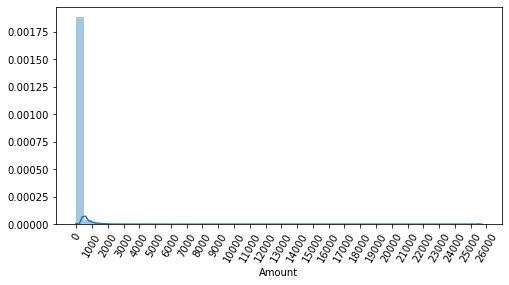

In [32]:
# 중요 피처 값의 분포도를 살펴봄
import seaborn as sns
plt.figure(figsize=(8,4))
plt.xticks(range(0,30000,1000), rotation=60)
sns.distplot(card_df['Amount'])

Amount, 즉 카드 사용 금액이 1000불 이하인 데이터가 대부분. 꼬리가 긴 형태의 분포

-> 표준 정규 분포 형태로 변환한 후 로지스틱 회귀의 예측 성능을 측정

In [41]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler() # 표준화?
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1,1)) # 크기 변경
    #변환된 Amount의 피처명 변경 후 df 앞 칼럼으로 입력
    df_copy.insert(0,'Amount_Scaled', amount_n)
    #기존 time, amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy


? .copy() / .insert()

위에서 만든 함수 적용 언제함? 적용 안해서 똑같이 나오는거같은데

In [42]:
# Amount를 정규 분포 형태로 변환 후 로지스틱 회귀, LightGBM 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85282    13]
 [   57    91]]
정확도: 0.9992, 정밀도: 0.8750, 재현율: 0.6149, F1: 0.7222, AUC: 0.9570
### LightGBM 예측 성능 ###
오차행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F1: 0.8453, AUC: 0.9790


두 모델 모두 변환 이전과 비교해 성능이 크게 개선되지는 않음.

In [43]:
# 로그 변환 수행
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount']) # 로그 변환
    #변환된 Amount의 피처명 변경 후 df 앞 칼럼으로 입력
    df_copy.insert(0,'Amount_Scaled', amount_n)
    #기존 time, amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy


In [44]:
# Amount를 로그 변환 후 로지스틱 회귀, LightGBM 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85282    13]
 [   57    91]]
정확도: 0.9992, 정밀도: 0.8750, 재현율: 0.6149, F1: 0.7222, AUC: 0.9570
### LightGBM 예측 성능 ###
오차행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F1: 0.8453, AUC: 0.9790


위랑 값이 똑같이 나옴,,,,

## 4. 이상치 데이터 제거 후 모델 학습/예측/평가

많은 피처가 있는 경우 결정값(레이블)과 가장 상관성이 높은 피처들 위주로 이상치를 검출하는 것이 좋음

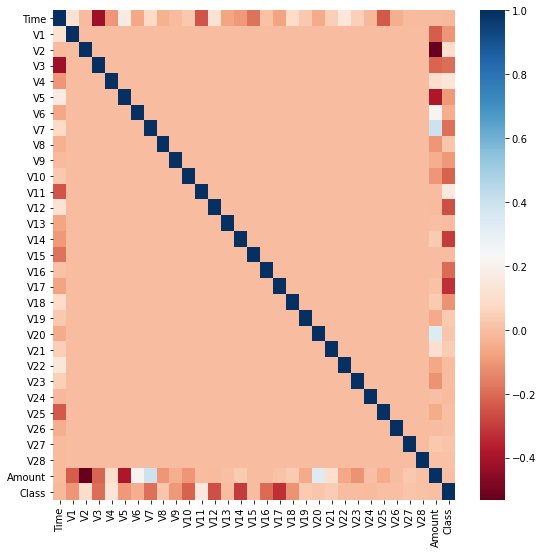

In [45]:
plt.figure(figsize=(9,9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

In [50]:
# 이상치를 검출하는 함수
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df['Class']==1][column] # fraud에 해당하는(class=1) column 데이터만 추출
    quantile_25 = np.percentile(fraud.values,25) #1/4 분위 지점을 구함
    quantile_75 = np.percentile(fraud.values,75) # 3/4분위 지점을 구함
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr*weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    # 이상치 데이터 설정 및 df index 반환
    outlier_index = fraud[(fraud < lowest_val)|(fraud > highest_val)].index
    return outlier_index

In [51]:
# V14에 대해 이상치 검출
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print("이상치 데이터 인덱스: ", outlier_index)

이상치 데이터 인덱스:  Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [52]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount']) # 로그 변환
    
    #변환된 Amount의 피처명 변경 후 df 앞 칼럼으로 입력
    df_copy.insert(0,'Amount_Scaled', amount_n)
    
    #기존 time, amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    
    #이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

# Amount를 로그 변환, 이상치 삭제 후 로지스틱 회귀, LightGBM 수행
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차행렬
[[85282    13]
 [   57    91]]
정확도: 0.9992, 정밀도: 0.8750, 재현율: 0.6149, F1: 0.7222, AUC: 0.9570
### LightGBM 예측 성능 ###
오차행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568, F1: 0.8453, AUC: 0.9790


예측 성능이 향상되었다고 함... 하지만 나한텐 그대로

## 5. SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가

In [55]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

SMOTE 적용 전 학습용 피처/레이블 데이터 세트:  (199364, 29) (199364,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트:  (398040, 29) (398040,)
SMOTE 적용 후 레이블 값 분포: 
 1    199020
0    199020
Name: Class, dtype: int64


SMOTE 전에비해 2배로 늘어났고, 0과 1의 개수가 동일해짐

-> 생성된 학습 데이터를 기반으로 로지스틱 회귀모델 학습

In [56]:
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train_over,ftr_test=X_test, 
                     tgt_train=y_train_over, tgt_test=y_test)


오차행렬
[[83939  1356]
 [   16   132]]
정확도: 0.9839, 정밀도: 0.0887, 재현율: 0.8919, F1: 0.1614, AUC: 0.9810


재현율이 0.89로 증가했으나 정밀도가 0.08로 급격하게 저하

In [57]:
#함수 정의
def precision_recall_curve_plot(y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold값 X축의 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, grid 설정
    plt.xlabel('Threshold value'); plt.ylabel("Precision and Recall value")
    plt.legend(); plt.grid()
    plt.show()


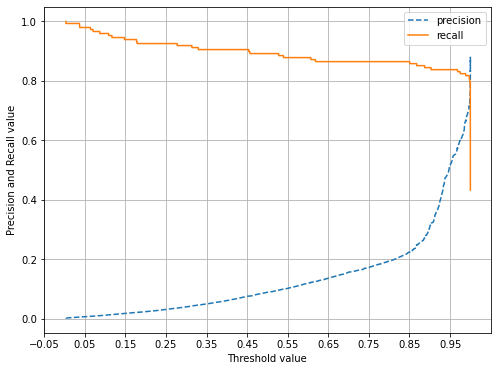

In [58]:
precision_recall_curve_plot(y_test, lr_clf.predict_proba(X_test)[:,1])

임계값이 0.99 이하에서는 재현율이 매우 좋고, 정밀도가 극단적으로 낮다가 0.99 이상에서는 반대로 재현율이 대폭 떨어지고, 정밀도가 높아짐.

-> 임계값의 민감도가 너무 심해 올바른 재현율/정밀도 성능을 얻을 수 없음. LightGBM 적용

In [59]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test, 
                     tgt_train=y_train_over, tgt_test=y_test)

오차행렬
[[85285    10]
 [   30   118]]
정확도: 0.9995, 정밀도: 0.9219, 재현율: 0.7973, F1: 0.8551, AUC: 0.9816


재현율은 높아졌으나 정밀도는 낮아지는게 일반적.

-> 좋은 SMOTE 패키지일수록 재현율 증가율은 높이고, 정밀도 감소율은 낮출 수 있도록

# 4-10 스태킹 앙상블

## 1. 기본 스태킹 모델

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier #Decision Tree

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()
X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label,
                                                    test_size=0.2, random_state=0)


In [4]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습, 예측할 최종 모델
lr_final = LogisticRegression(C=10)

In [5]:
# 개별 모델 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train) 
dt_clf.fit(X_train, y_train) 
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [7]:
# 학습된 개별 모델이 반환하는 예측 데이터 세트를 생성, 각 모델의 정확도 측정
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)
# gbm_pred = gbm_clf.predict(X_test) 

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9211
결정 트리 정확도: 0.9211
에이다부스트 정확도: 0.9211


In [11]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [13]:
# 최종 메타모델인 로지스틱 회귀를 학습하고, 예측 정확도를 측정
lr_final.fit(pred, y_test) # y_test로 학습 -> 과적합 우려
final = lr_final.predict(pred)

print('최종 메타모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타모델의 예측 정확도: 0.9737


개별 모델 정확도보다 향상됨.

cv 세트 기반 스태킹 모델: 과적합 개선

## 2. CV 세트 기반의 스태킹

### 스텝1: 각 모델별로 cv 기반 학습, 테스트 데이터 예측 결과 값이 메타 모델의 학습, 테스트 데이터가 됨

In [18]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델-> 최종 메타 모델이 학습할 학습, 테스트 데이터 생성 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
    
    # 지정된 n_folds 값으로 KFold 생성
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    
    # 추후 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
    train_fold_pred = np.zeros((X_train_n.shape[0],1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))
    print(model.__class__.__name__,'model 시작 ')
    
    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        # 입력된 학습 데이터에서 기반 모델이 학습, 예측할 폴드 데이터 세트 추출
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_te = X_train_n[valid_index]
        
        # 폴드 세트 내부에서 만들어진 학습 데이터로 기반 모델의 학습 
        model.fit(X_tr, y_tr)
        # 폴드 세트 내부에서 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 저장 
        test_pred[:, folder_counter] = model.predict(X_test_n)
    
    #폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)
    
    # 최종 메타 모델이 사용하는 학습, 테스트 데이터 반환
    return train_fold_pred, test_pred_mean

In [19]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


RandomForestClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


DecisionTreeClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


### 스텝2: 스텝1에서 개별 모델이 생성한 학습, 테스트 데이터를 스태킹으로 합쳐 메타 모델의 학습, 테스트 데이터가 됨

In [21]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train),axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test),axis=1)

print('원본 학습 피처 데이터 Shape', X_train.shape, 
      '원본 테스트 피처 Shape', X_test.shape)
print('스태킹 학습 피처 데이터 Shape', Stack_final_X_train.shape, 
      '스태킹 테스트 피처 Shape', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape (455, 30) 원본 테스트 피처 Shape (114, 30)
스태킹 학습 피처 데이터 Shape (455, 4) 스태킹 테스트 피처 Shape (114, 4)


In [23]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타모델의 예측 정확도: 0.9737
